<h1><center>CSCI - 4146 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Assignment 3</h1></center>

<b>Anantha Suraj</b>  
<B00>B00845171  


<b>Parvish Vijay Gajjar</b>  
<B00>B00912090

Reference: Assignment 2 code was referred in certain parts of the A4 solution module
> Some of the cells takes minimum of 5-10 minutes to complile the trained models

In [2]:
# importing the modules and installing the packages
import pandas as pd
import numpy as np
from pandas.io import json

import warnings
warnings.filterwarnings('ignore')

!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# creating an access id for the dataframe for user access to samples the 1 million data values
!gdown 1QxT-UYbsXubQrWaduMfnI_gVrTdJ73-B

Downloading...
From: https://drive.google.com/uc?id=1QxT-UYbsXubQrWaduMfnI_gVrTdJ73-B
To: /content/sample.jsonl
100% 824M/824M [00:03<00:00, 252MB/s]


In [4]:
# Accessing the data file for evaluation
data_set = pd.read_json("/content/sample.jsonl", lines=True)
data_set.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,3,2,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,NaN
1,5,NaN,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,{'Format:': ' Hardcover'},True Value Girl,Love it,Five Stars,1418256000,NaN
2,4,3,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,{'Format:': ' Hardcover'},Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,NaN
3,4,NaN,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,{'Format:': ' Kindle Edition'},Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,NaN
4,2,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,{'Format:': ' Kindle Edition'},J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,NaN


### 1. Data understanding<a id='top'></a>

> **Substituting the values in more meaningful manner before data quality check**



In [5]:
# text-length, count of words, alphanumeric characters, etc
data_set['Text_Length'] = data_set['reviewText'].str.len().fillna(0.0).astype(int)
data_set['Word Count'] = data_set['reviewText'].str.count(' ') + 1
data_set['Word Count']=data_set['Word Count'].fillna(0.0).astype(int)

data_set['nonAlphaNumericCharactersCount']=data_set['reviewText'].str.count(r'[^a-zA-Z0-9 ]').fillna(0.0).astype(int)


data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   overall                         1000000 non-null  int64 
 1   vote                            195489 non-null   object
 2   verified                        1000000 non-null  bool  
 3   reviewTime                      1000000 non-null  object
 4   reviewerID                      1000000 non-null  object
 5   asin                            1000000 non-null  object
 6   style                           982181 non-null   object
 7   reviewerName                    999966 non-null   object
 8   reviewText                      999876 non-null   object
 9   summary                         999693 non-null   object
 10  unixReviewTime                  1000000 non-null  int64 
 11  image                           2233 non-null     object
 12  Text_Length    

In [6]:
data_set

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,Text_Length,Word Count,nonAlphaNumericCharactersCount
0,3,2,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,NaN,617,118,25
1,5,NaN,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,{'Format:': ' Hardcover'},True Value Girl,Love it,Five Stars,1418256000,NaN,7,2,0
2,4,3,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,{'Format:': ' Hardcover'},Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,NaN,1419,252,40
3,4,NaN,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,{'Format:': ' Kindle Edition'},Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,NaN,314,46,12
4,2,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,{'Format:': ' Kindle Edition'},J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,NaN,235,47,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3,NaN,True,"12 1, 2017",A1PLIAXAWGGEZO,B01HH2OZVS,{'Format:': ' Kindle Edition'},Linda Cope,What I liked most was the personal stories of ...,What I liked most was the personal stories of ...,1512086400,NaN,364,69,6
999996,3,NaN,False,"12 22, 2016",A1Q3MLS48AUBKO,B01HHC2MD6,{'Format:': ' Kindle Edition'},weaselbit,The story is alright. The writing style is a b...,The story is alright. The writing style is a ...,1482364800,NaN,130,24,5
999997,5,NaN,False,"07 2, 2016",A34MRZFAZPPESL,B01HHC2MD6,{'Format:': ' Kindle Edition'},skygypsy,l really loved this little book. The author's...,A Lovely Little Feel-Good Story,1467417600,NaN,200,38,6
999998,5,NaN,True,"01 26, 2017",ARFHS6IU8WI0,B01HIIHU7W,{'Format:': ' Kindle Edition'},DonnaL,I have read everything Keith Blackmore has wri...,Love Keith Blackmore's books!,1485388800,NaN,120,21,1


> ## 1. Build the data quality report ##

> Extracting the numerical and textual values from the dataset

In [7]:
numeric_columns = data_set.select_dtypes(include=np.number)
print("The numerical data feature etraction from the dataset: \n")
numeric_columns

The numerical data feature etraction from the dataset: 



,overall,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount
0,3,1021680000,617,118,25
1,5,1418256000,7,2,0
2,4,1136505600,1419,252,40
3,4,1417996800,314,46,12
4,2,1393804800,235,47,7
...,...,...,...,...,...
999995,3,1512086400,364,69,6
999996,3,1482364800,130,24,5
999997,5,1467417600,200,38,6
999998,5,1485388800,120,21,1


In [8]:
non_numeric_columns = data_set.select_dtypes(exclude=np.number)
print("The numerical data feature etraction from the dataset: \n")
non_numeric_columns

The numerical data feature etraction from the dataset: 



,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,image
0,2,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,NaN
1,NaN,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,{'Format:': ' Hardcover'},True Value Girl,Love it,Five Stars,NaN
2,3,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,{'Format:': ' Hardcover'},Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,NaN
3,NaN,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,{'Format:': ' Kindle Edition'},Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",NaN
4,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,{'Format:': ' Kindle Edition'},J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,NaN
...,...,...,...,...,...,...,...,...,...,...
999995,NaN,True,"12 1, 2017",A1PLIAXAWGGEZO,B01HH2OZVS,{'Format:': ' Kindle Edition'},Linda Cope,What I liked most was the personal stories of ...,What I liked most was the personal stories of ...,NaN
999996,NaN,False,"12 22, 2016",A1Q3MLS48AUBKO,B01HHC2MD6,{'Format:': ' Kindle Edition'},weaselbit,The story is alright. The writing style is a b...,The story is alright. The writing style is a ...,NaN
999997,NaN,False,"07 2, 2016",A34MRZFAZPPESL,B01HHC2MD6,{'Format:': ' Kindle Edition'},skygypsy,l really loved this little book. The author's...,A Lovely Little Feel-Good Story,NaN
999998,NaN,True,"01 26, 2017",ARFHS6IU8WI0,B01HIIHU7W,{'Format:': ' Kindle Edition'},DonnaL,I have read everything Keith Blackmore has wri...,Love Keith Blackmore's books!,NaN


In [9]:
# continous feature data report
data_set.describe(include=['number'])

,overall,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount
count,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,4.373181,1.406255e+09,541.045622,97.083995,17.215010
std,0.999680,1.010109e+08,867.980126,150.538900,32.188307
min,1.000000,8.496576e+08,0.000000,0.000000,0.000000
25%,4.000000,1.376266e+09,114.000000,21.000000,3.000000
50%,5.000000,1.425686e+09,227.000000,42.000000,6.000000
75%,5.000000,1.472602e+09,599.000000,110.000000,18.000000
max,5.000000,1.537920e+09,31759.000000,5568.000000,4915.000000


In [10]:
#Referred tutorial 2 for continous and categorical feature structure report building. 
# Accessed on July 23rd 2022

from matplotlib import pyplot as plt
import warnings
# Data Quality report for Continous features of the data set
def continuous_features_report(data_set):

    stats = {
        "Count": len,
        "Mean": lambda df: df.mean(),
        "Std. Dev.": lambda df: df.std(),
        "Min": lambda df: df.min(),
        "Median": lambda df: df.median(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique()
    }


    continous_feature_names = data_set.select_dtypes("number").columns
    continuous_dataframeValues = data_set[continous_feature_names]

    report_df = pd.DataFrame(index=continous_feature_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # Warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_dataframeValues)

    return report_df

In [11]:
continous_report = continuous_features_report(data_set)
continous_report

,Count,Mean,Std. Dev.,Min,Median,1st Qrt.,3rd Qrt,Max,Miss %,Card.
overall,1000000,4.373181e+00,9.996799e-01,1,5.000000e+00,4.000000e+00,5.000000e+00,5,0.0,5
unixReviewTime,1000000,1.406255e+09,1.010109e+08,849657600,1.425686e+09,1.376266e+09,1.472602e+09,1537920000,0.0,7514
Text_Length,1000000,5.410456e+02,8.679801e+02,0,2.270000e+02,1.140000e+02,5.990000e+02,31759,0.0,7917
Word Count,1000000,9.708400e+01,1.505389e+02,0,4.200000e+01,2.100000e+01,1.100000e+02,5568,0.0,1999
nonAlphaNumericCharactersCount,1000000,1.721501e+01,3.218831e+01,0,6.000000e+00,3.000000e+00,1.800000e+01,4915,0.0,680


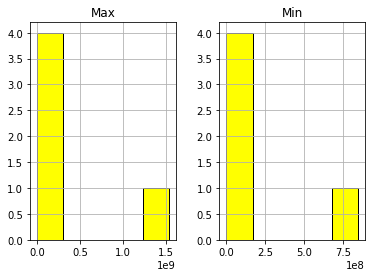

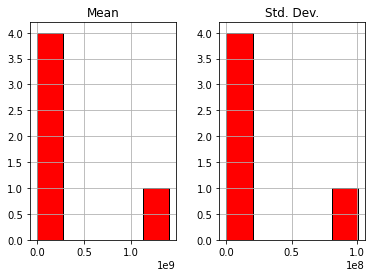

In [12]:
# examining the relationship between max and min values of the continous data report
continous_report.hist(column=['Max', 'Min'], color = 'yellow', edgecolor = 'black', label="Min", bins = 5);
continous_report.hist(column=['Mean', 'Std. Dev.'], color = 'red', edgecolor = 'black', label="Min", bins = 5);

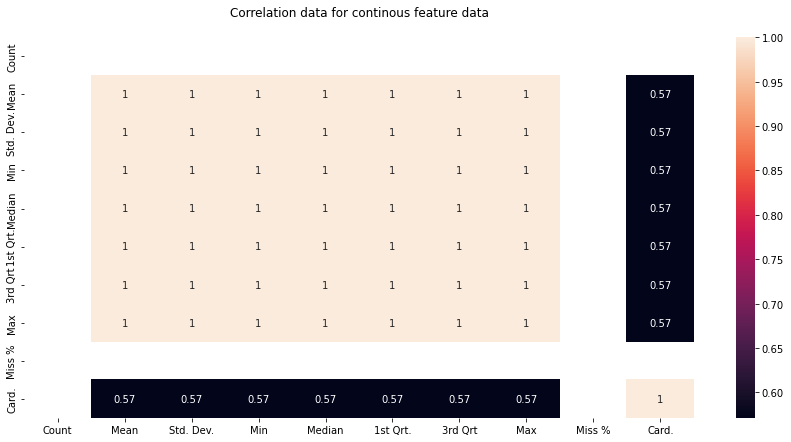

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation among variables
plt.figure(figsize=(15, 7))
correl_heatmap = sns.heatmap(continous_report.corr(), annot = True)
correl_heatmap.set(title="Correlation data for continous feature data\n");

In [14]:
#Referred tutorial 2 code for categorical feature structure report building. 
# Accessed on July 23rd 2022

# Data Quality report preparation for Categorical features of the data set

import warnings

def categorical_features_report(data_set):


    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list())

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    # implementing a structure table of a categorical feature for evaluating the data quality report
    table_attributes = {
         "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }


    categorical_feature_names = data_set.select_dtypes(exclude="number").columns
    continuous_data_dataframe = data_set[categorical_feature_names]

    report_df = pd.DataFrame(index=categorical_feature_names, columns=table_attributes.keys())

    for stat_name, fn in table_attributes.items():
        # Warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_dataframe)

    return report_df

In [15]:
print("The categorical data feature extraction from the dataset to anaylize the data quality issues: \n")
categorical_report = categorical_features_report(numeric_columns)
categorical_report

The categorical data feature extraction from the dataset to anaylize the data quality issues: 



,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %


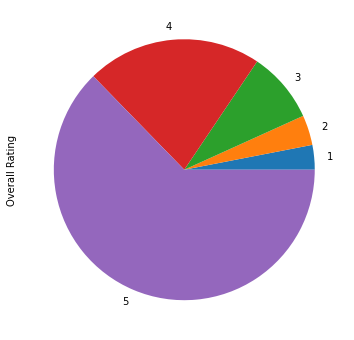

In [16]:
data_churn = data_set.groupby(['overall']).size()
data_churn.plot(kind='pie', ylabel='Overall Rating', xlabel='Review', figsize=(10, 6));

In [17]:
# sampling the data to 100,000 for preprocessing

data_set_filtered = data_set.sample(frac = 0.10)



> **2. Identify data quality issues and build the data quality plan.** 





> Data quality issues are defined as the incompetency in the data which causes the data to be complex and more inaccurate by having null values, irrelevant information, etc. This as a result causes some innacurate results for the target variable and gives an inappropriate prediction values. We can overcome this through data quality eradication modules like deleteing irrelevant columns, dropping the null values, etc.

> From the given dataset, we can see few of the data quality issues like:

> 1.   Missing few values in some areas. We can solve this issue by replacing the data instances with space, mean or 0. This as a result will not effect any final accuracy of the data or other parts of the code.
> 2. Changing boolean attribute columns to numberical data (0 and 1) like verification and other soft-max type models. We can get some accurate data on data set.
> 3. Removing unwanted columns like reviewID, images as it is not used anywhere and causing some inbalance, complex accuracy score and final prediction.








> **3. Preprocess your data according to the data quality plan.**

In [18]:
# Dropping unnecessary columns which does not provide any impact to the dataset
data_set_filtered=data_set_filtered.drop('reviewerID', axis=1)

In [19]:
data_set_filtered=data_set_filtered.drop('image', axis=1)

As the nan values in the vote column is around 804511, we can remove the column for better data quality extraction. We can remove the nan values and make it to 0, but the rest 20000 values doesnt make any impact on the data performance.

In [20]:
data_set_filtered['vote'].isna().sum()

80482

In [21]:
data_set_filtered=data_set_filtered.drop('vote', axis=1)

In [22]:
# removing all the null values and filling it with zero values
data_set_filtered['reviewText'].isna().sum()

16

In [23]:
data_set_filtered = data_set_filtered.dropna(subset = ["reviewText"])

In [24]:
data_set_filtered['summary'].isna().sum()

40

In [25]:
data_set_filtered['summary'] = data_set_filtered['summary'].fillna('')

In [26]:
data_set_filtered['summary'].isna().sum()

0

In [27]:
data_set_filtered['style'].isna().sum()

1786

In [28]:
# reviews upto
data_set_filtered["overall"].unique()

array([5, 3, 4, 2, 1])

In [29]:
# changing the boolean values to integers
data_set_filtered['verified'] = data_set_filtered['verified'].astype(int)

In [30]:
def fillEmptyStyle(data):
  if pd.isnull(data):
    return {}
  else:
    return data

data_set_filtered['style']=data_set_filtered['style'].map(fillEmptyStyle)

In [31]:
# extracting the column format values from the style module
def createFormatColumn1(data):
  if 'Format:' in data.keys():
    return data['Format:'];
  else:
    return ''

data_set_filtered['format']=data_set_filtered['style'].map(createFormatColumn1)

In [32]:
data_set_filtered['reviewerName'] = data_set_filtered['reviewerName'].fillna(0)

In [33]:
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount,format
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,186,32,Audio CD
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,22,6,Kindle Edition
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,109,14,
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,34,4,Hardcover
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,28,11,Paperback
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,299,91,Paperback
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,66,14,Paperback
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,73,15,Hardcover
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,31,4,Paperback


In [34]:
# number of missing values after extraction
data_set_filtered.isnull().sum()

overall                           0
verified                          0
reviewTime                        0
asin                              0
style                             0
reviewerName                      0
reviewText                        0
summary                           0
unixReviewTime                    0
Text_Length                       0
Word Count                        0
nonAlphaNumericCharactersCount    0
format                            0
dtype: int64

> **4. Answer the following questions:**



> > **1. What is the distribution of the top 50 most frequent words (excluding the stop words) for each of the textual features?**



In [35]:
# "NLTK's list of english stopwords", Gist, 2022. [Online]. Available: https://gist.github.com/sebleier/554280.
stopWords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [36]:
# extracting stopwords from the text columns
def countStopWords(text):
  count=0
  for j in text.split(' '):
    if j in stopWords:
      count+=1
  return count

data_set_filtered['reviewTextStopWords']=data_set_filtered['reviewText'].map(countStopWords)

In [37]:
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount,format,reviewTextStopWords
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,186,32,Audio CD,85
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,22,6,Kindle Edition,8
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,109,14,,50
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,34,4,Hardcover,17
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,28,11,Paperback,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,299,91,Paperback,113
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,66,14,Paperback,26
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,73,15,Hardcover,30
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,31,4,Paperback,14


In [38]:
# function creating a new column which do not contains any stop words in the column
def createTextWithoutStopWords(text):
  output=''
  for i in text.split(' '):
    if i.lower() not in stopWords:
      output+=i+" "
  return output.rstrip() 
data_set_filtered['reviewTextFiltered']=data_set_filtered['reviewText'].map(createTextWithoutStopWords)
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount,format,reviewTextStopWords,reviewTextFiltered
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,186,32,Audio CD,85,book great! David Levithan really wonderful au...
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,22,6,Kindle Edition,8,Could put down. kept wanting know happen next....
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,109,14,,50,one best non-fiction books ever read. Timothy ...
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,34,4,Hardcover,17,"son turned ""the man"" comes hunting hogs. Grea..."
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,28,11,Paperback,13,book amazing!! pulls beginning keeps wondering...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,299,91,Paperback,113,Louv opens doors look upon contemporary proble...
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,66,14,Paperback,26,spiritual content traditional Russian Orthodox...
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,73,15,Hardcover,30,"one Clan Donald, love wee book. turned many fr..."
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,31,4,Paperback,14,"used editions Rome, Florence, Prague, Stockhol..."


In [39]:
# extracting the topp 50 mot frequently used words
from collections import Counter
Counter(" ".join(data_set_filtered["reviewTextFiltered"]).split()).most_common(50)

[('book', 82588),
 ('read', 38352),
 ('one', 31189),
 ('story', 30671),
 ('like', 26073),
 ('would', 21452),
 ('love', 20981),
 ('book.', 19593),
 ('good', 19546),
 ('really', 19186),
 ('great', 17166),
 ('get', 15635),
 ('characters', 15448),
 ('much', 15444),
 ('reading', 15355),
 ('books', 15213),
 ('first', 14864),
 ('time', 13189),
 ('well', 13149),
 ('many', 12869),
 ('also', 12697),
 ('-', 12325),
 ('even', 12141),
 ('it.', 12055),
 ('author', 11827),
 ('could', 11728),
 ('way', 11437),
 ('know', 11055),
 ('life', 10916),
 ('I', 10912),
 ('series', 10300),
 ('little', 10116),
 ('see', 10088),
 ('think', 10004),
 ('loved', 9949),
 ('find', 9937),
 ('make', 9658),
 ('people', 9604),
 ('want', 9442),
 ('book,', 9375),
 ("don't", 9282),
 ('enjoyed', 9202),
 ('new', 9076),
 ('two', 9058),
 ('The', 8904),
 ('never', 8860),
 ("I'm", 8796),
 ('read.', 8648),
 ("didn't", 8536),
 ('found', 8424)]

> > **2. What is the proportion of each format in the dataset?**

In [40]:
# findint the proportion percentage of the format values in the data
data_set_filtered["format"].value_counts(normalize=True)*100

 Kindle Edition           56.126980
 Paperback                22.948672
 Hardcover                13.322132
 Mass Market Paperback     3.145503
                           1.791287
                            ...    
 Kitchen                   0.001000
 JP Oversized              0.001000
 Baby Product              0.001000
 Electronics               0.001000
 Accessory                 0.001000
Name: format, Length: 70, dtype: float64

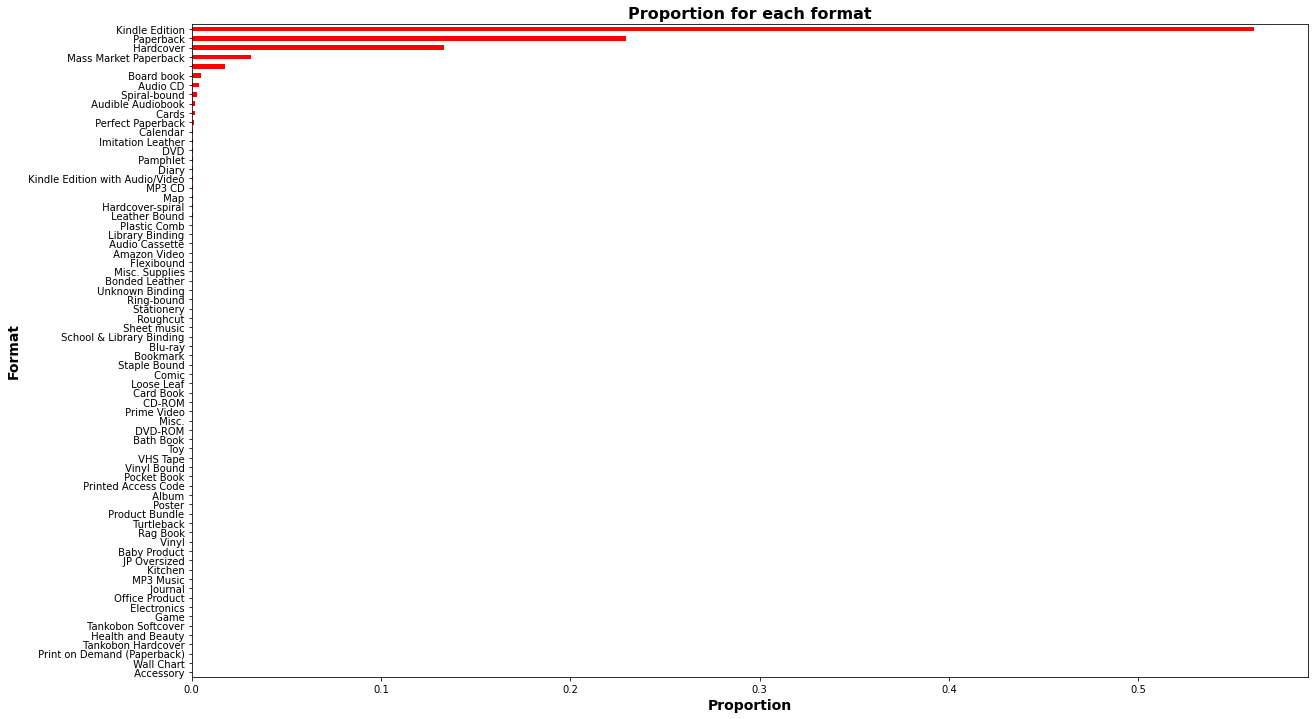

In [41]:
fig = plt.figure(figsize =(20, 12))
plt.xlabel('Proportion', fontsize=14.0, fontweight='bold')
plt.ylabel('Format', fontsize=14.0, fontweight='bold')
plt.title('Proportion for each format', fontsize=16.0, fontweight='bold')
data_set_filtered["format"].value_counts(normalize=True).sort_values().plot(kind = 'barh', color="red");

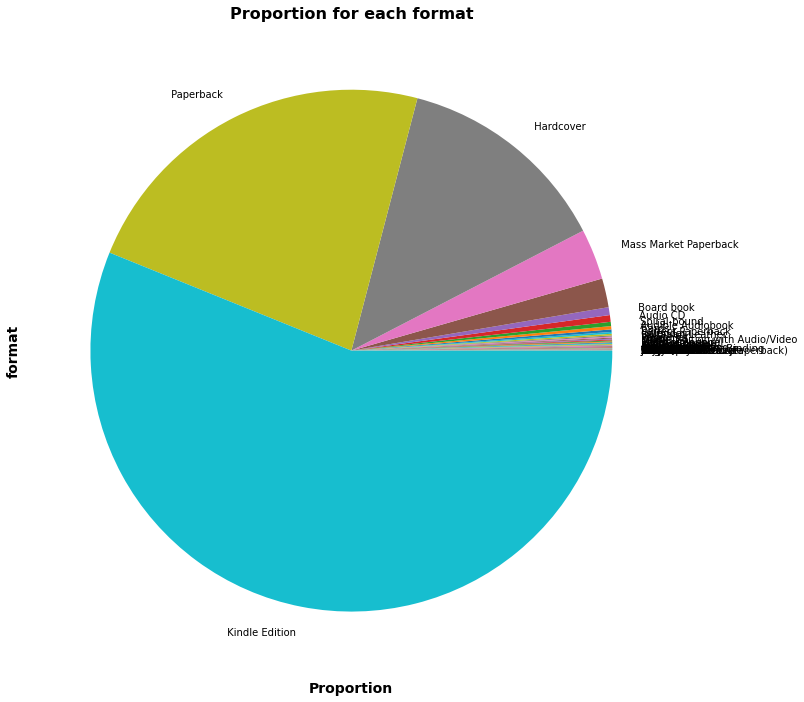

In [42]:
fig = plt.figure(figsize =(20, 12))
plt.xlabel('Proportion', fontsize=14.0, fontweight='bold')
plt.ylabel('Format', fontsize=14.0, fontweight='bold')
plt.title('Proportion for each format', fontsize=16.0, fontweight='bold')
data_set_filtered["format"].value_counts(normalize=True).sort_values().plot(kind = 'pie');

> >**3. What is the most/least common format of the books?**

Based on the below extraction we can see that there are four types of modules in the style column, where we can see that the most commonly used module for the books are Format, which has more than 100 attributes, color has 1 attribute whereas style_name and size has around 10-15 attributes.

In [43]:
# Reference: https://www.geeksforgeeks.org/python-program-to-get-all-unique-keys-from-a-list-of-dictionaries/ Accessed on 23rd July 2022
from itertools import chain
def extractKey(dataColumn):
  
    # Stores the list of unique keys
    res1 = list(set(chain.from_iterable(sub.keys() for sub in dataColumn)))
    res2 = list(set(chain.from_iterable(sub.values() for sub in dataColumn)))
  
    # Print the list
    print("Keys in style column: ",str(res1))
    print("Values in style dictionary: ",str(res2))
  
extractKey(data_set_filtered['style'])

Keys in style column:  ['Format:', 'Size:', 'Color:']
Values in style dictionary:  [' Sheet music', ' Library Binding', ' DVD', ' Leather Bound', ' Audio CD', ' Office Product', ' Navy Blue', ' Game', ' Paperback', ' Bath Book', ' Loose Leaf', ' VHS Tape', ' Staple Bound', ' Tankobon Softcover', ' JP Oversized', ' Hardcover', ' Mass Market Paperback', ' Plastic Comb', ' DVD-ROM', ' Rag Book', ' Toy', ' Duck Egg', ' Turtleback', ' Album', ' Product Bundle', ' Poster', ' coloring book', ' MP3 Music', ' School & Library Binding', ' Kitchen', ' Comic', ' Journal', ' Kindle Edition', ' Kindle Edition with Audio/Video', ' Vinyl', ' Printed Access Code', ' Accessory', ' CD-ROM', ' Map', ' Calendar', ' Cards', ' Pamphlet', ' Audio Cassette', ' Amazon Video', ' Pocket Book', ' Unknown Binding', ' Prime Video', ' Bonded Leather', ' Board book', ' Tankobon Hardcover', ' Electronics', ' Perfect Paperback', ' Health and Beauty', ' MP3 CD', ' Bookmark', ' 18 X 18 Inches', ' Print on Demand (Paperbac

> >**4. What patterns can you find in your data? E.g., if you look at the counts for
each overall score, people tend to give more positive reviews than
negatives. (you are encouraged to find different patterns to the one
proposed here as an example)**

In [44]:
a = data_set_filtered["overall"]
b = data_set_filtered["format"].value_counts(normalize=True).sort_values();
new_table = data_set_filtered[['overall', 'format']]
new_table["Most Rated Sort"] = data_set_filtered['format'].map(data_set_filtered['format'].value_counts())

In [45]:
new_table

,overall,format,Most Rated Sort
196263,5,Audio CD,414
841765,5,Kindle Edition,56118
796959,5,,1791
960041,5,Hardcover,13320
527939,5,Paperback,22945
...,...,...,...
681225,5,Paperback,22945
398806,4,Paperback,22945
867604,5,Hardcover,13320
854943,4,Paperback,22945


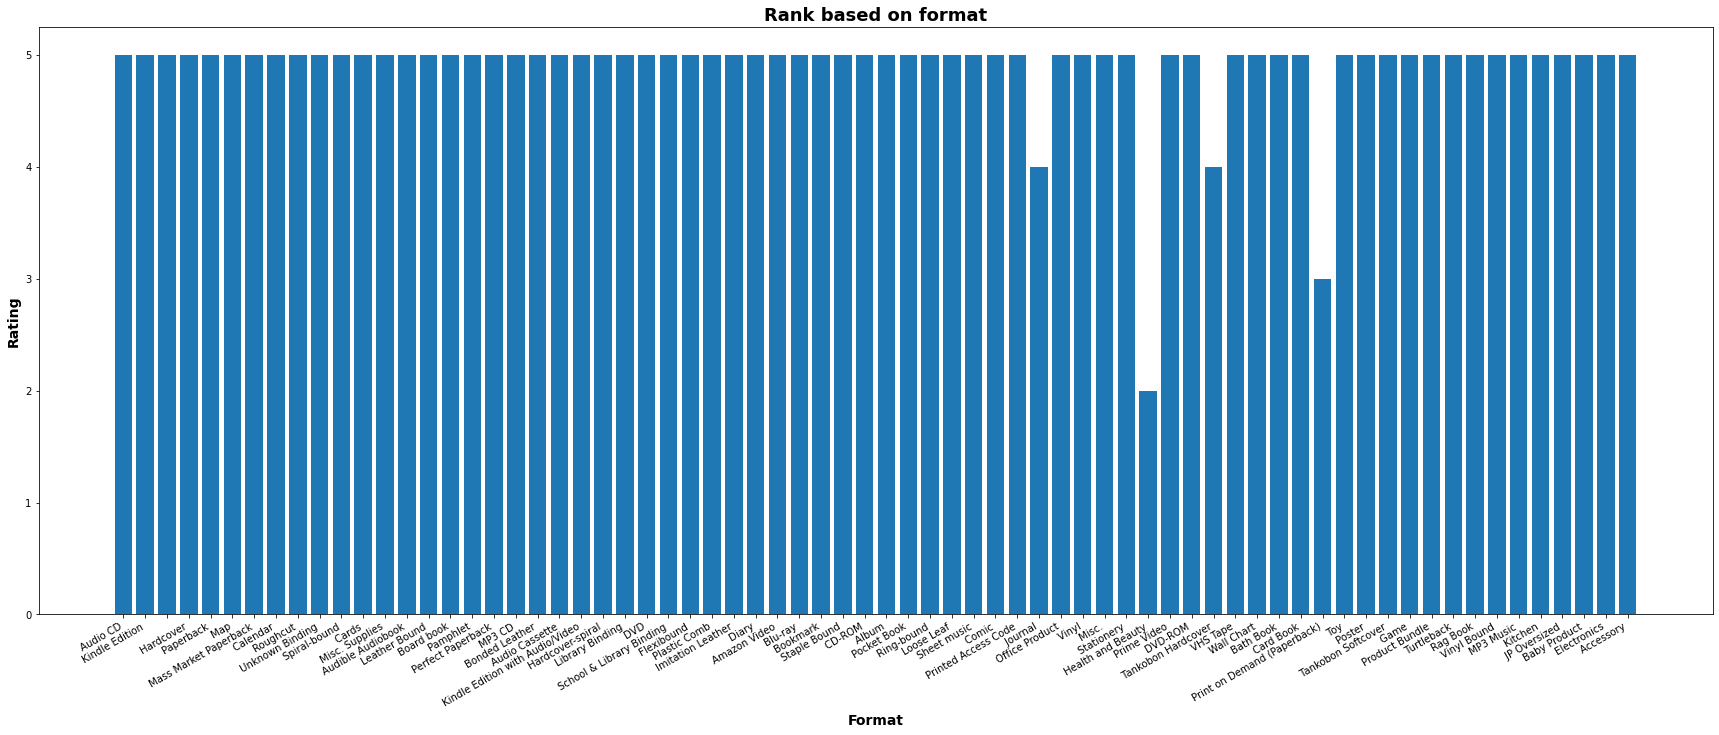

In [46]:
# execution takes 3-4 minutes
fig = plt.figure(figsize =(30, 12))
plt.bar(new_table["format"], new_table["overall"])
plt.title('Rank based on format',fontsize=18.0, fontweight='bold')
plt.xlabel('Format',fontsize=14.0, fontweight='bold')
plt.ylabel('Rating',fontsize=14.0, fontweight='bold')
fig.autofmt_xdate()
plt.show()

> > If we extract the most used formats and find the rating overview, we can state that Kindle Edition is one of thepopular books that has most ratings and reviews when compared with other values. Thereafter the most reviewed and rated modules are Paperback and Hardcover.

 ### 2. Text normalization and feature engineering

>**1. Create a new column merging review summary and text.**

In [47]:
# merging the columns and creating the new column to place the outut in it
data_set_filtered["Merge"] = data_set_filtered[['reviewTextFiltered', 'summary']].agg(' '.join, axis=1)

In [48]:
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount,format,reviewTextStopWords,reviewTextFiltered,Merge
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,186,32,Audio CD,85,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,22,6,Kindle Edition,8,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,109,14,,50,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,34,4,Hardcover,17,"son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea..."
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,28,11,Paperback,13,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,299,91,Paperback,113,Louv opens doors look upon contemporary proble...,Louv opens doors look upon contemporary proble...
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,66,14,Paperback,26,spiritual content traditional Russian Orthodox...,spiritual content traditional Russian Orthodox...
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,73,15,Hardcover,30,"one Clan Donald, love wee book. turned many fr...","one Clan Donald, love wee book. turned many fr..."
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,31,4,Paperback,14,"used editions Rome, Florence, Prague, Stockhol...","used editions Rome, Florence, Prague, Stockhol..."


> **2. Remove stop words.**

In [49]:
# utilizing the previously defined function to remove the stop words from the merged column
data_set_filtered['MergeWithoutStopWords']=data_set_filtered['Merge'].map(createTextWithoutStopWords)
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount,format,reviewTextStopWords,reviewTextFiltered,Merge,MergeWithoutStopWords
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,186,32,Audio CD,85,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,22,6,Kindle Edition,8,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,109,14,,50,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,34,4,Hardcover,17,"son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea..."
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,28,11,Paperback,13,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,299,91,Paperback,113,Louv opens doors look upon contemporary proble...,Louv opens doors look upon contemporary proble...,Louv opens doors look upon contemporary proble...
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,66,14,Paperback,26,spiritual content traditional Russian Orthodox...,spiritual content traditional Russian Orthodox...,spiritual content traditional Russian Orthodox...
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,73,15,Hardcover,30,"one Clan Donald, love wee book. turned many fr...","one Clan Donald, love wee book. turned many fr...","one Clan Donald, love wee book. turned many fr..."
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,31,4,Paperback,14,"used editions Rome, Florence, Prague, Stockhol...","used editions Rome, Florence, Prague, Stockhol...","used editions Rome, Florence, Prague, Stockhol..."


In [50]:
# checking stop words count after removing the words
data_set_filtered['Stoppers']=data_set_filtered['MergeWithoutStopWords'].map(countStopWords)

> **3. Remove numbers and other non-letter characters.**

In [51]:
# removing all the digits and non letters using regex pattern
data_set_filtered['RemoveDigitsNonLetters'] = data_set_filtered['MergeWithoutStopWords'].str.replace('[^a-zA-Z ]', '')
data_set_filtered['RemoveDigitsNonLetters_Count']=data_set_filtered['MergeWithoutStopWords'].str.count('[^a-zA-Z ]')
data_set_filtered['RemoveDigitsNonLetters_TrimCount']=data_set_filtered['RemoveDigitsNonLetters'].str.count('[^a-zA-Z ]')

In [52]:
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,...,nonAlphaNumericCharactersCount,format,reviewTextStopWords,reviewTextFiltered,Merge,MergeWithoutStopWords,Stoppers,RemoveDigitsNonLetters,RemoveDigitsNonLetters_Count,RemoveDigitsNonLetters_TrimCount
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,...,32,Audio CD,85,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...,0,book great David Levithan really wonderful aut...,34,0
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,...,6,Kindle Edition,8,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....,0,Could put down kept wanting know happen nextHi...,6,0
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,...,14,,50,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...,0,one best nonfiction books ever read Timothy Eg...,18,0
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,...,4,Hardcover,17,"son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea...",0,son turned the man comes hunting hogs Great s...,7,0
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,...,11,Paperback,13,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...,0,book amazing pulls beginning keeps wondering e...,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,...,91,Paperback,113,Louv opens doors look upon contemporary proble...,Louv opens doors look upon contemporary proble...,Louv opens doors look upon contemporary proble...,0,Louv opens doors look upon contemporary proble...,102,0
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,...,14,Paperback,26,spiritual content traditional Russian Orthodox...,spiritual content traditional Russian Orthodox...,spiritual content traditional Russian Orthodox...,0,spiritual content traditional Russian Orthodox...,16,0
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,...,15,Hardcover,30,"one Clan Donald, love wee book. turned many fr...","one Clan Donald, love wee book. turned many fr...","one Clan Donald, love wee book. turned many fr...",0,one Clan Donald love wee book turned many frie...,15,0
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,...,4,Paperback,14,"used editions Rome, Florence, Prague, Stockhol...","used editions Rome, Florence, Prague, Stockhol...","used editions Rome, Florence, Prague, Stockhol...",0,used editions Rome Florence Prague Stockholm P...,4,0


> **4. Perform either lemmatization or stemming. Motivate your choice.**

In [53]:
Counter(" ".join(data_set_filtered["RemoveDigitsNonLetters"]).split()).most_common(50)

[('book', 123490),
 ('read', 57913),
 ('story', 45420),
 ('one', 37289),
 ('like', 28252),
 ('good', 25934),
 ('love', 25702),
 ('books', 23062),
 ('characters', 22236),
 ('would', 22002),
 ('great', 21774),
 ('series', 20820),
 ('really', 20354),
 ('it', 19320),
 ('reading', 19011),
 ('time', 18922),
 ('much', 17814),
 ('well', 17443),
 ('life', 16541),
 ('first', 16497),
 ('get', 16236),
 ('author', 15182),
 ('way', 14778),
 ('many', 13539),
 ('Stars', 13485),
 ('also', 13194),
 ('even', 12572),
 ('know', 12371),
 ('could', 12167),
 ('people', 11647),
 ('Great', 11403),
 ('loved', 11082),
 ('think', 10858),
 ('little', 10787),
 ('see', 10700),
 ('written', 10536),
 ('find', 10277),
 ('end', 10124),
 ('new', 10099),
 ('make', 10075),
 ('want', 10062),
 ('enjoyed', 10044),
 ('two', 10001),
 ('Im', 9862),
 ('dont', 9772),
 ('Five', 9725),
 ('novel', 9292),
 ('never', 9162),
 ('best', 9071),
 ('didnt', 8950)]

In [54]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [55]:
# Referred tutorial 11 for stemming the text
# import stemmer from nltk based on porter algorithm
from nltk.stem import PorterStemmer

# extracting most commonly used words in the column to check the root extract word
filtered_sent = ['book', 'books', 'its', 'it','enjoyed','does','reading', 'books', 'series','writing', 'loved']

# instantiate stemmer
ps = PorterStemmer()

# create new sentence with stemmed words
stemmed_words = [ps.stem(w) for w in filtered_sent]   

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['book', 'books', 'its', 'it', 'enjoyed', 'does', 'reading', 'books', 'series', 'writing', 'loved']
Stemmed Sentence: ['book', 'book', 'it', 'it', 'enjoy', 'doe', 'read', 'book', 'seri', 'write', 'love']


In [56]:
# Lemmatization execution is not productive in this case
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "series"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: series
Stemmed Word: seri


In [57]:
for val in data_set_filtered['RemoveDigitsNonLetters']:
  (val,"\n")

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
# Reference: referred geekforgeeks stemmer concept. Accessed on July 23rd
# importing modules

# extracting few columns from the data fram which does not have stp words to find the root words
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
 
ps = PorterStemmer()
 
sentence1 = "Great reference Five Stars"
sentence2 = "Verbose esoteric Okay"
sentence3 = "well written good story hey  WESTERN GOOD READ"
sentence4 = "again  could put down  Thank again could put "
sentence5 = "ending surprise  really enjoyed book really enjoyed book "
words1 = word_tokenize(sentence1)
words2 = word_tokenize(sentence2)
words3 = word_tokenize(sentence3)
words4 = word_tokenize(sentence4)
words5 = word_tokenize(sentence5)
 
print("Finding the root words from the extracted data values")
i=1
for w in words1:
    print(w, " : ", ps.stem(w))
print("\t")
for w in words2:
    print(w, " : ", ps.stem(w))
print("\t")
for w in words3:
    print(w, " : ", ps.stem(w))
print("\t")
for w in words4:
    print(w, " : ", ps.stem(w))
print("\t")
for w in words5:
    print(w, " : ", ps.stem(w))

Finding the root words from the extracted data values
Great  :  great
reference  :  refer
Five  :  five
Stars  :  star
	
Verbose  :  verbos
esoteric  :  esoter
Okay  :  okay
	
well  :  well
written  :  written
good  :  good
story  :  stori
hey  :  hey
WESTERN  :  western
GOOD  :  good
READ  :  read
	
again  :  again
could  :  could
put  :  put
down  :  down
Thank  :  thank
again  :  again
could  :  could
put  :  put
	
ending  :  end
surprise  :  surpris
really  :  realli
enjoyed  :  enjoy
book  :  book
really  :  realli
enjoyed  :  enjoy
book  :  book


From the both concepts we felt stemming is better option as it is faster in execution and providing the root word prefixes to the wor in the context. In Lemmatization, the model is taking comparitively greater time to execute and the results were not that effective when compared to stemming in this case.

> **5. Convert the corpus into a bag-of-words TF-IDF weighted vector representation.**

In [60]:
data_set_filtered['Split'] = data_set_filtered['RemoveDigitsNonLetters'].str.split(' ').str.join(',')

In [61]:
for val in data_set_filtered['Split']:
  (val,"\n")

In [62]:
list_block = data_set_filtered['RemoveDigitsNonLetters'].tolist()

In [63]:
# as the random access memory is not supporting 1 million data values to evaluate 30 random reviews were extracted
import random
list_block_extract = random.sample(list_block, 30)
list_block_extract

for i in list_block_extract:
  print(i)

book shipped swiftly got neat quality good damages but didnt come cover ordered in wont sending back wont keep myself buy book again exactly ordered
discovered Gene StrattonPorter  months ago fell love books  eagerly read everything could get Kindle enjoyed hit book  surprised come across word Jap early book thought must mistake  book went on kept trying make excuses author racism white supremacy became prevalent shocked saddened way running theme story leading characters likeable every way presented strong wise people recognized foreign threat need white supremacy  couldnt believe printed wish hadnt forever altered view author  still love books understand product time still sad disappointing  Skip this youll glad did Skip oneit make cringe
good Five Stars
enjoy superbly written fast moving books compelling characters story lines book you  say book impossible put down  great Read book
guilty pleasure week LOVED it could put down Full scandal lies blackmail drama Rumors fail entertain l

In [64]:
# Referrence: https://pythonprogramminglanguage.com/bag-of-words/ Accessed on july 23rd

from sklearn.feature_extraction.text import CountVectorizer
# uniqueVal = set(list_block_extract)
vectorizer = CountVectorizer()
print( vectorizer.fit_transform(list_block_extract).todense(),"\n")


marklist = sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)
print(sortdict)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

{'zane': 1064, 'youre': 1063, 'youll': 1062, 'youd': 1061, 'you': 1060, 'yet': 1059, 'yes': 1058, 'years': 1057, 'yearold': 1056, 'ye': 1055, 'wyatt': 1054, 'written': 1053, 'writes': 1052, 'writers': 1051, 'wrap': 1050, 'wow': 1049, 'wounds': 1048, 'would': 1047, 'worthy': 1046, 'worth': 1045, 'world': 1044, 'work': 1043, 'word': 1042, 'woods': 1041, 'wont': 1040, 'wonderfully': 1039, 'wonderful': 1038, 'without': 1037, 'wished': 1036, 'wish': 1035, 'wisecracking': 1034, 'wise': 1033, 'winchester': 1032, 'wincest': 1031, 'wife': 1030, 'wide': 1029, 'whole': 1028, 'white': 1027, 'which': 1026, 'whats': 1025, 'went': 1024, 'welldeveloped': 1023, 'well': 1022, 'week': 1021, 'wedding': 1020, 'web': 1019, 'weary': 1018, 'wayward': 1017, 'ways': 1016, 'way': 1015, 'watching': 1014, 'watched': 1013, 'watch': 1012, 'wasnt': 1011, 'was': 1010, 'warned': 1009, 'war': 1008, '

In [65]:
# Reference: https://pythonwife.com/tf-idf-vectors-in-natural-language-processing/

# finding tf-idf weights for the data representation
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = pd.Series(list_block_extract)
vectorizer = TfidfVectorizer()
tf_idf_matrix  = vectorizer.fit_transform(corpus)
feature_array = tf_idf_matrix.toarray()
feature_array

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.1108378, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [66]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

tf_idf =  vec.fit_transform(list_block_extract)
print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names()))

     ability    able     about  absolutely  abstinent  accepted  according  \
0   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
1   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
2   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
3   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
4   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
5   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
6   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
7   0.000000  0.2434  0.000000    0.000000   0.000000  0.000000   0.000000   
8   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
9   0.000000  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
10  0.107352  0.0000  0.000000    0.000000   0.000000  0.000000   0.000000   
11  0.000000  0.0000  0.000000    0.000000   0.000000  0.000000 

###3. Build a model to predict overall score

> **1. Use score as the target variable. Explain what is the task you’re solving (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x etc).**

> The task that we are solving here is that of predicting the overall score with the help of supervised learning while using a regression model. It is a better practice to use regression model when the problem statement involves predicting a value between a range of value. For us, in the above dataset the relevant values will lie between 1 to 5.

> **2. Use a feature selection method to select the features to build a model.**

In [74]:
#@title
positiveWords=["a+", "abound", "abounds", "abundance", "abundant", "accessable", "accessible", "acclaim", "acclaimed", "acclamation", "accolade", "accolades", "accommodative", "accomodative", "accomplish", "accomplished", "accomplishment", "accomplishments", "accurate", "accurately", "achievable", "achievement", "achievements", "achievible", "acumen", "adaptable", "adaptive", "adequate", "adjustable", "admirable", "admirably", "admiration", "admire", "admirer", "admiring", "admiringly", "adorable", "adore", "adored", "adorer", "adoring", "adoringly", "adroit", "adroitly", "adulate", "adulation", "adulatory", "advanced", "advantage", "advantageous", "advantageously", "advantages", "adventuresome", "adventurous", "advocate", "advocated", "advocates", "affability", "affable", "affably", "affectation", "affection", "affectionate", "affinity", "affirm", "affirmation", "affirmative", "affluence", "affluent", "afford", "affordable", "affordably", "afordable", "agile", "agilely", "agility", "agreeable", "agreeableness", "agreeably", "all-around", "alluring", "alluringly", "altruistic", "altruistically", "amaze", "amazed", "amazement", "amazes", "amazing", "amazingly", "ambitious", "ambitiously", "ameliorate", "amenable", "amenity", "amiability", "amiabily", "amiable", "amicability", "amicable", "amicably", "amity", "ample", "amply", "amuse", "amusing", "amusingly", "angel", "angelic", "apotheosis", "appeal", "appealing", "applaud", "appreciable", "appreciate", "appreciated", "appreciates", "appreciative", "appreciatively", "appropriate", "approval", "approve", "ardent", "ardently", "ardor", "articulate", "aspiration", "aspirations", "aspire", "assurance", "assurances", "assure", "assuredly", "assuring", "astonish", "astonished", "astonishing", "astonishingly", "astonishment", "astound", "astounded", "astounding", "astoundingly", "astutely", "attentive", "attraction", "attractive", "attractively", "attune", "audible", "audibly", "auspicious", "authentic", "authoritative", "autonomous", "available", "aver", "avid", "avidly", "award", "awarded", "awards", "awe", "awed", "awesome", "awesomely", "awesomeness", "awestruck", "awsome", "backbone", "balanced", "bargain", "beauteous", "beautiful", "beautifullly", "beautifully", "beautify", "beauty", "beckon", "beckoned", "beckoning", "beckons", "believable", "believeable", "beloved", "benefactor", "beneficent", "beneficial", "beneficially", "beneficiary", "benefit", "benefits", "benevolence", "benevolent", "benifits", "best", "best-known", "best-performing", "best-selling", "better", "better-known", "better-than-expected", "beutifully", "blameless", "bless", "blessing", "bliss", "blissful", "blissfully", "blithe", "blockbuster", "bloom", "blossom", "bolster", "bonny", "bonus", "bonuses", "boom", "booming", "boost", "boundless", "bountiful", "brainiest", "brainy", "brand-new", "brave", "bravery", "bravo", "breakthrough", "breakthroughs", "breathlessness", "breathtaking", "breathtakingly", "breeze", "bright", "brighten", "brighter", "brightest", "brilliance", "brilliances", "brilliant", "brilliantly", "brisk", "brotherly", "bullish", "buoyant", "cajole", "calm", "calming", "calmness", "capability", "capable", "capably", "captivate", "captivating", "carefree", "cashback", "cashbacks", "catchy", "celebrate", "celebrated", "celebration", "celebratory", "champ", "champion", "charisma", "charismatic", "charitable", "charm", "charming", "charmingly", "chaste", "cheaper", "cheapest", "cheer", "cheerful", "cheery", "cherish", "cherished", "cherub", "chic", "chivalrous", "chivalry", "civility", "civilize", "clarity", "classic", "classy", "clean", "cleaner", "cleanest", "cleanliness", "cleanly", "clear", "clear-cut", "cleared", "clearer", "clearly", "clears", "clever", "cleverly", "cohere", "coherence", "coherent", "cohesive", "colorful", "comely", "comfort", "comfortable", "comfortably", "comforting", "comfy", "commend", "commendable", "commendably", "commitment", "commodious", "compact", "compactly", "compassion", "compassionate", "compatible", "competitive", "complement", "complementary", "complemented", "complements", "compliant", "compliment", "complimentary", "comprehensive", "conciliate", "conciliatory", "concise", "confidence", "confident", "congenial", "congratulate", "congratulation", "congratulations", "congratulatory", "conscientious", "considerate", "consistent", "consistently", "constructive", "consummate", "contentment", "continuity", "contrasty", "contribution", "convenience", "convenient", "conveniently", "convience", "convienient", "convient", "convincing", "convincingly", "cool", "coolest", "cooperative", "cooperatively", "cornerstone", "correct", "correctly", "cost-effective", "cost-saving", "counter-attack", "counter-attacks", "courage", "courageous", "courageously", "courageousness", "courteous", "courtly", "covenant", "cozy", "creative", "credence", "credible", "crisp", "crisper", "cure", "cure-all", "cushy", "cute", "cuteness", "danke", "danken", "daring", "daringly", "darling", "dashing", "dauntless", "dawn", "dazzle", "dazzled", "dazzling", "dead-cheap", "dead-on", "decency", "decent", "decisive", "decisiveness", "dedicated", "defeat", "defeated", "defeating", "defeats", "defender", "deference", "deft", "deginified", "delectable", "delicacy", "delicate", "delicious", "delight", "delighted", "delightful", "delightfully", "delightfulness", "dependable", "dependably", "deservedly", "deserving", "desirable", "desiring", "desirous", "destiny", "detachable", "devout", "dexterous", "dexterously", "dextrous", "dignified", "dignify", "dignity", "diligence", "diligent", "diligently", "diplomatic", "dirt-cheap", "distinction", "distinctive", "distinguished", "diversified", "divine", "divinely", "dominate", "dominated", "dominates", "dote", "dotingly", "doubtless", "dreamland", "dumbfounded", "dumbfounding", "dummy-proof", "durable", "dynamic", "eager", "eagerly", "eagerness", "earnest", "earnestly", "earnestness", "ease", "eased", "eases", "easier", "easiest", "easiness", "easing", "easy", "easy-to-use", "easygoing", "ebullience", "ebullient", "ebulliently", "ecenomical", "economical", "ecstasies", "ecstasy", "ecstatic", "ecstatically", "edify", "educated", "effective", "effectively", "effectiveness", "effectual", "efficacious", "efficient", "efficiently", "effortless", "effortlessly", "effusion", "effusive", "effusively", "effusiveness", "elan", "elate", "elated", "elatedly", "elation", "electrify", "elegance", "elegant", "elegantly", "elevate", "elite", "eloquence", "eloquent", "eloquently", "embolden", "eminence", "eminent", "empathize", "empathy", "empower", "empowerment", "enchant", "enchanted", "enchanting", "enchantingly", "encourage", "encouragement", "encouraging", "encouragingly", "endear", "endearing", "endorse", "endorsed", "endorsement", "endorses", "endorsing", "energetic", "energize", "energy-efficient", "energy-saving", "engaging", "engrossing", "enhance", "enhanced", "enhancement", "enhances", "enjoy", "enjoyable", "enjoyably", "enjoyed", "enjoying", "enjoyment", "enjoys", "enlighten", "enlightenment", "enliven", "ennoble", "enough", "enrapt", "enrapture", "enraptured", "enrich", "enrichment", "enterprising", "entertain", "entertaining", "entertains", "enthral", "enthrall", "enthralled", "enthuse", "enthusiasm", "enthusiast", "enthusiastic", "enthusiastically", "entice", "enticed", "enticing", "enticingly", "entranced", "entrancing", "entrust", "enviable", "enviably", "envious", "enviously", "enviousness", "envy", "equitable", "ergonomical", "err-free", "erudite", "ethical", "eulogize", "euphoria", "euphoric", "euphorically", "evaluative", "evenly", "eventful", "everlasting", "evocative", "exalt", "exaltation", "exalted", "exaltedly", "exalting", "exaltingly", "examplar", "examplary", "excallent", "exceed", "exceeded", "exceeding", "exceedingly", "exceeds", "excel", "exceled", "excelent", "excellant", "excelled", "excellence", "excellency", "excellent", "excellently", "excels", "exceptional", "exceptionally", "excite", "excited", "excitedly", "excitedness", "excitement", "excites", "exciting", "excitingly", "exellent", "exemplar", "exemplary", "exhilarate", "exhilarating", "exhilaratingly", "exhilaration", "exonerate", "expansive", "expeditiously", "expertly", "exquisite", "exquisitely", "extol", "extoll", "extraordinarily", "extraordinary", "exuberance", "exuberant", "exuberantly", "exult", "exultant", "exultation", "exultingly", "eye-catch", "eye-catching", "eyecatch", "eyecatching", "fabulous", "fabulously", "facilitate", "fair", "fairly", "fairness", "faith", "faithful", "faithfully", "faithfulness", "fame", "famed", "famous", "famously", "fancier", "fancinating", "fancy", "fanfare", "fans", "fantastic", "fantastically", "fascinate", "fascinating", "fascinatingly", "fascination", "fashionable", "fashionably", "fast", "fast-growing", "fast-paced", "faster", "fastest", "fastest-growing", "faultless", "fav", "fave", "favor", "favorable", "favored", "favorite", "favorited", "favour", "fearless", "fearlessly", "feasible", "feasibly", "feat", "feature-rich", "fecilitous", "feisty", "felicitate", "felicitous", "felicity", "fertile", "fervent", "fervently", "fervid", "fervidly", "fervor", "festive", "fidelity", "fiery", "fine", "fine-looking", "finely", "finer", "finest", "firmer", "first-class", "first-in-class", "first-rate", "flashy", "flatter", "flattering", "flatteringly", "flawless", "flawlessly", "flexibility", "flexible", "flourish", "flourishing", "fluent", "flutter", "fond", "fondly", "fondness", "foolproof", "foremost", "foresight", "formidable", "fortitude", "fortuitous", "fortuitously", "fortunate", "fortunately", "fortune", "fragrant", "free", "freed", "freedom", "freedoms", "fresh", "fresher", "freshest", "friendliness", "friendly", "frolic", "frugal", "fruitful", "ftw", "fulfillment", "fun", "futurestic", "futuristic", "gaiety", "gaily", "gain", "gained", "gainful", "gainfully", "gaining", "gains", "gallant", "gallantly", "galore", "geekier", "geeky", "gem", "gems", "generosity", "generous", "generously", "genial", "genius", "gentle", "gentlest", "genuine", "gifted", "glad", "gladden", "gladly", "gladness", "glamorous", "glee", "gleeful", "gleefully", "glimmer", "glimmering", "glisten", "glistening", "glitter", "glitz", "glorify", "glorious", "gloriously", "glory", "glow", "glowing", "glowingly", "god-given", "god-send", "godlike", "godsend", "gold", "golden", "good", "goodly", "goodness", "goodwill", "goood", "gooood", "gorgeous", "gorgeously", "grace", "graceful", "gracefully", "gracious", "graciously", "graciousness", "grand", "grandeur", "grateful", "gratefully", "gratification", "gratified", "gratifies", "gratify", "gratifying", "gratifyingly", "gratitude", "great", "greatest", "greatness", "grin", "groundbreaking", "guarantee", "guidance", "guiltless", "gumption", "gush", "gusto", "gutsy", "hail", "halcyon", "hale", "hallmark", "hallmarks", "hallowed", "handier", "handily", "hands-down", "handsome", "handsomely", "handy", "happier", "happily", "happiness", "happy", "hard-working", "hardier", "hardy", "harmless", "harmonious", "harmoniously", "harmonize", "harmony", "headway", "heal", "healthful", "healthy", "hearten", "heartening", "heartfelt", "heartily", "heartwarming", "heaven", "heavenly", "helped", "helpful", "helping", "hero", "heroic", "heroically", "heroine", "heroize", "heros", "high-quality", "high-spirited", "hilarious", "holy", "homage", "honest", "honesty", "honor", "honorable", "honored", "honoring", "hooray", "hopeful", "hospitable", "hot", "hotcake", "hotcakes", "hottest", "hug", "humane", "humble", "humility", "humor", "humorous", "humorously", "humour", "humourous", "ideal", "idealize", "ideally", "idol", "idolize", "idolized", "idyllic", "illuminate", "illuminati", "illuminating", "illumine", "illustrious", "ilu", "imaculate", "imaginative", "immaculate", "immaculately", "immense", "impartial", "impartiality", "impartially", "impassioned", "impeccable", "impeccably", "important", "impress", "impressed", "impresses", "impressive", "impressively", "impressiveness", "improve", "improved", "improvement", "improvements", "improves", "improving", "incredible", "incredibly", "indebted", "individualized", "indulgence", "indulgent", "industrious", "inestimable", "inestimably", "inexpensive", "infallibility", "infallible", "infallibly", "influential", "ingenious", "ingeniously", "ingenuity", "ingenuous", "ingenuously", "innocuous", "innovation", "innovative", "inpressed", "insightful", "insightfully", "inspiration", "inspirational", "inspire", "inspiring", "instantly", "instructive", "instrumental", "integral", "integrated", "intelligence", "intelligent", "intelligible", "interesting", "interests", "intimacy", "intimate", "intricate", "intrigue", "intriguing", "intriguingly", "intuitive", "invaluable", "invaluablely", "inventive", "invigorate", "invigorating", "invincibility", "invincible", "inviolable", "inviolate", "invulnerable", "irreplaceable", "irreproachable", "irresistible", "irresistibly", "issue-free", "jaw-droping", "jaw-dropping", "jollify", "jolly", "jovial", "joy", "joyful", "joyfully", "joyous", "joyously", "jubilant", "jubilantly", "jubilate", "jubilation", "jubiliant", "judicious", "justly", "keen", "keenly", "keenness", "kid-friendly", "kindliness", "kindly", "kindness", "knowledgeable", "kudos", "large-capacity", "laud", "laudable", "laudably", "lavish", "lavishly", "law-abiding", "lawful", "lawfully", "lead", "leading", "leads", "lean", "led", "legendary", "leverage", "levity", "liberate", "liberation", "liberty", "lifesaver", "light-hearted", "lighter", "likable", "like", "liked", "likes", "liking", "lionhearted", "lively", "logical", "long-lasting", "lovable", "lovably", "love", "loved", "loveliness", "lovely", "lover", "loves", "loving", "low-cost", "low-price", "low-priced", "low-risk", "lower-priced", "loyal", "loyalty", "lucid", "lucidly", "luck", "luckier", "luckiest", "luckiness", "lucky", "lucrative", "luminous", "lush", "luster", "lustrous", "luxuriant", "luxuriate", "luxurious", "luxuriously", "luxury", "lyrical", "magic", "magical", "magnanimous", "magnanimously", "magnificence", "magnificent", "magnificently", "majestic", "majesty", "manageable", "maneuverable", "marvel", "marveled", "marvelled", "marvellous", "marvelous", "marvelously", "marvelousness", "marvels", "master", "masterful", "masterfully", "masterpiece", "masterpieces", "masters", "mastery", "matchless", "mature", "maturely", "maturity", "meaningful", "memorable", "merciful", "mercifully", "mercy", "merit", "meritorious", "merrily", "merriment", "merriness", "merry", "mesmerize", "mesmerized", "mesmerizes", "mesmerizing", "mesmerizingly", "meticulous", "meticulously", "mightily", "mighty", "mind-blowing", "miracle", "miracles", "miraculous", "miraculously", "miraculousness", "modern", "modest", "modesty", "momentous", "monumental", "monumentally", "morality", "motivated", "multi-purpose", "navigable", "neat", "neatest", "neatly", "nice", "nicely", "nicer", "nicest", "nifty", "nimble", "noble", "nobly", "noiseless", "non-violence", "non-violent", "notably", "noteworthy", "nourish", "nourishing", "nourishment", "novelty", "nurturing", "oasis", "obsession", "obsessions", "obtainable", "openly", "openness", "optimal", "optimism", "optimistic", "opulent", "orderly", "originality", "outdo", "outdone", "outperform", "outperformed", "outperforming", "outperforms", "outshine", "outshone", "outsmart", "outstanding", "outstandingly", "outstrip", "outwit", "ovation", "overjoyed", "overtake", "overtaken", "overtakes", "overtaking", "overtook", "overture", "pain-free", "painless", "painlessly", "palatial", "pamper", "pampered", "pamperedly", "pamperedness", "pampers", "panoramic", "paradise", "paramount", "pardon", "passion", "passionate", "passionately", "patience", "patient", "patiently", "patriot", "patriotic", "peace", "peaceable", "peaceful", "peacefully", "peacekeepers", "peach", "peerless", "pep", "pepped", "pepping", "peppy", "peps", "perfect", "perfection", "perfectly", "permissible", "perseverance", "persevere", "personages", "personalized", "phenomenal", "phenomenally", "picturesque", "piety", "pinnacle", "playful", "playfully", "pleasant", "pleasantly", "pleased", "pleases", "pleasing", "pleasingly", "pleasurable", "pleasurably", "pleasure", "plentiful", "pluses", "plush", "plusses", "poetic", "poeticize", "poignant", "poise", "poised", "polished", "polite", "politeness", "popular", "portable", "posh", "positive", "positively", "positives", "powerful", "powerfully", "praise", "praiseworthy", "praising", "pre-eminent", "precious", "precise", "precisely", "preeminent", "prefer", "preferable", "preferably", "prefered", "preferes", "preferring", "prefers", "premier", "prestige", "prestigious", "prettily", "pretty", "priceless", "pride", "principled", "privilege", "privileged", "prize", "proactive", "problem-free", "problem-solver", "prodigious", "prodigiously", "prodigy", "productive", "productively", "proficient", "proficiently", "profound", "profoundly", "profuse", "profusion", "progress", "progressive", "prolific", "prominence", "prominent", "promise", "promised", "promises", "promising", "promoter", "prompt", "promptly", "proper", "properly", "propitious", "propitiously", "pros", "prosper", "prosperity", "prosperous", "prospros", "protect", "protection", "protective", "proud", "proven", "proves", "providence", "proving", "prowess", "prudence", "prudent", "prudently", "punctual", "pure", "purify", "purposeful", "quaint", "qualified", "qualify", "quicker", "quiet", "quieter", "radiance", "radiant", "rapid", "rapport", "rapt", "rapture", "raptureous", "raptureously", "rapturous", "rapturously", "rational", "razor-sharp", "reachable", "readable", "readily", "ready", "reaffirm", "reaffirmation", "realistic", "realizable", "reasonable", "reasonably", "reasoned", "reassurance", "reassure", "receptive", "reclaim", "recomend", "recommend", "recommendation", "recommendations", "recommended", "reconcile", "reconciliation", "record-setting", "recover", "recovery", "rectification", "rectify", "rectifying", "redeem", "redeeming", "redemption", "refine", "refined", "refinement", "reform", "reformed", "reforming", "reforms", "refresh", "refreshed", "refreshing", "refund", "refunded", "regal", "regally", "regard", "rejoice", "rejoicing", "rejoicingly", "rejuvenate", "rejuvenated", "rejuvenating", "relaxed", "relent", "reliable", "reliably", "relief", "relish", "remarkable", "remarkably", "remedy", "remission", "remunerate", "renaissance", "renewed", "renown", "renowned", "replaceable", "reputable", "reputation", "resilient", "resolute", "resound", "resounding", "resourceful", "resourcefulness", "respect", "respectable", "respectful", "respectfully", "respite", "resplendent", "responsibly", "responsive", "restful", "restored", "restructure", "restructured", "restructuring", "retractable", "revel", "revelation", "revere", "reverence", "reverent", "reverently", "revitalize", "revival", "revive", "revives", "revolutionary", "revolutionize", "revolutionized", "revolutionizes", "reward", "rewarding", "rewardingly", "rich", "richer", "richly", "richness", "right", "righten", "righteous", "righteously", "righteousness", "rightful", "rightfully", "rightly", "rightness", "risk-free", "robust", "rock-star", "rock-stars", "rockstar", "rockstars", "romantic", "romantically", "romanticize", "roomier", "roomy", "rosy", "safe", "safely", "sagacity", "sagely", "saint", "saintliness", "saintly", "salutary", "salute", "sane", "satisfactorily", "satisfactory", "satisfied", "satisfies", "satisfy", "satisfying", "satisified", "saver", "savings", "savior", "savvy", "scenic", "seamless", "seasoned", "secure", "securely", "selective", "self-determination", "self-respect", "self-satisfaction", "self-sufficiency", "self-sufficient", "sensation", "sensational", "sensationally", "sensations", "sensible", "sensibly", "sensitive", "serene", "serenity", "sexy", "sharp", "sharper", "sharpest", "shimmering", "shimmeringly", "shine", "shiny", "significant", "silent", "simpler", "simplest", "simplified", "simplifies", "simplify", "simplifying", "sincere", "sincerely", "sincerity", "skill", "skilled", "skillful", "skillfully", "slammin", "sleek", "slick", "smart", "smarter", "smartest", "smartly", "smile", "smiles", "smiling", "smilingly", "smitten", "smooth", "smoother", "smoothes", "smoothest", "smoothly", "snappy", "snazzy", "sociable", "soft", "softer", "solace", "solicitous", "solicitously", "solid", "solidarity", "soothe", "soothingly", "sophisticated", "soulful", "soundly", "soundness", "spacious", "sparkle", "sparkling", "spectacular", "spectacularly", "speedily", "speedy", "spellbind", "spellbinding", "spellbindingly", "spellbound", "spirited", "spiritual", "splendid", "splendidly", "splendor", "spontaneous", "sporty", "spotless", "sprightly", "stability", "stabilize", "stable", "stainless", "standout", "state-of-the-art", "stately", "statuesque", "staunch", "staunchly", "staunchness", "steadfast", "steadfastly", "steadfastness", "steadiest", "steadiness", "steady", "stellar", "stellarly", "stimulate", "stimulates", "stimulating", "stimulative", "stirringly", "straighten", "straightforward", "streamlined", "striking", "strikingly", "striving", "strong", "stronger", "strongest", "stunned", "stunning", "stunningly", "stupendous", "stupendously", "sturdier", "sturdy", "stylish", "stylishly", "stylized", "suave", "suavely", "sublime", "subsidize", "subsidized", "subsidizes", "subsidizing", "substantive", "succeed", "succeeded", "succeeding", "succeeds", "succes", "success", "successes", "successful", "successfully", "suffice", "sufficed", "suffices", "sufficient", "sufficiently", "suitable", "sumptuous", "sumptuously", "sumptuousness", "super", "superb", "superbly", "superior", "superiority", "supple", "support", "supported", "supporter", "supporting", "supportive", "supports", "supremacy", "supreme", "supremely", "supurb", "supurbly", "surmount", "surpass", "surreal", "survival", "survivor", "sustainability", "sustainable", "swank", "swankier", "swankiest", "swanky", "sweeping", "sweet", "sweeten", "sweetheart", "sweetly", "sweetness", "swift", "swiftness", "talent", "talented", "talents", "tantalize", "tantalizing", "tantalizingly", "tempt", "tempting", "temptingly", "tenacious", "tenaciously", "tenacity", "tender", "tenderly", "terrific", "terrifically", "thank", "thankful", "thinner", "thoughtful", "thoughtfully", "thoughtfulness", "thrift", "thrifty", "thrill", "thrilled", "thrilling", "thrillingly", "thrills", "thrive", "thriving", "thumb-up", "thumbs-up", "tickle", "tidy", "time-honored", "timely", "tingle", "titillate", "titillating", "titillatingly", "togetherness", "tolerable", "toll-free", "top", "top-notch", "top-quality", "topnotch", "tops", "tough", "tougher", "toughest", "traction", "tranquil", "tranquility", "transparent", "treasure", "tremendously", "trendy", "triumph", "triumphal", "triumphant", "triumphantly", "trivially", "trophy", "trouble-free", "trump", "trumpet", "trust", "trusted", "trusting", "trustingly", "trustworthiness", "trustworthy", "trusty", "truthful", "truthfully", "truthfulness", "twinkly", "ultra-crisp", "unabashed", "unabashedly", "unaffected", "unassailable", "unbeatable", "unbiased", "unbound", "uncomplicated", "unconditional", "undamaged", "undaunted", "understandable", "undisputable", "undisputably", "undisputed", "unencumbered", "unequivocal", "unequivocally", "unfazed", "unfettered", "unforgettable", "unity", "unlimited", "unmatched", "unparalleled", "unquestionable", "unquestionably", "unreal", "unrestricted", "unrivaled", "unselfish", "unwavering", "upbeat", "upgradable", "upgradeable", "upgraded", "upheld", "uphold", "uplift", "uplifting", "upliftingly", "upliftment", "upscale", "usable", "useable", "useful", "user-friendly", "user-replaceable", "valiant", "valiantly", "valor", "valuable", "variety", "venerate", "verifiable", "veritable", "versatile", "versatility", "vibrant", "vibrantly", "victorious", "victory", "viewable", "vigilance", "vigilant", "virtue", "virtuous", "virtuously", "visionary", "vivacious", "vivid", "vouch", "vouchsafe", "warm", "warmer", "warmhearted", "warmly", "warmth", "wealthy", "welcome", "well", "well-backlit", "well-balanced", "well-behaved", "well-being", "well-bred", "well-connected", "well-educated", "well-established", "well-informed", "well-intentioned", "well-known", "well-made", "well-managed", "well-mannered", "well-positioned", "well-received", "well-regarded", "well-rounded", "well-run", "well-wishers", "wellbeing", "whoa", "wholeheartedly", "wholesome", "whooa", "whoooa", "wieldy", "willing", "willingly", "willingness", "win", "windfall", "winnable", "winner", "winners", "winning", "wins", "wisdom", "wise", "wisely", "witty", "won", "wonder", "wonderful", "wonderfully", "wonderous", "wonderously", "wonders", "wondrous", "woo", "work", "workable", "worked", "works", "world-famous", "worth", "worth-while", "worthiness", "worthwhile", "worthy", "wow", "wowed", "wowing", "wows", "yay", "youthful", "zeal", "zenith", "zest", "zippy"]

In [75]:
#@title
negativeWords=["2-faced", "2-faces", "abnormal", "abolish", "abominable", "abominably", "abominate", "abomination", "abort", "aborted", "aborts", "abrade", "abrasive", "abrupt", "abruptly", "abscond", "absence", "absent-minded", "absentee", "absurd", "absurdity", "absurdly", "absurdness", "abuse", "abused", "abuses", "abusive", "abysmal", "abysmally", "abyss", "accidental", "accost", "accursed", "accusation", "accusations", "accuse", "accuses", "accusing", "accusingly", "acerbate", "acerbic", "acerbically", "ache", "ached", "aches", "achey", "aching", "acrid", "acridly", "acridness", "acrimonious", "acrimoniously", "acrimony", "adamant", "adamantly", "addict", "addicted", "addicting", "addicts", "admonish", "admonisher", "admonishingly", "admonishment", "admonition", "adulterate", "adulterated", "adulteration", "adulterier", "adversarial", "adversary", "adverse", "adversity", "afflict", "affliction", "afflictive", "affront", "afraid", "aggravate", "aggravating", "aggravation", "aggression", "aggressive", "aggressiveness", "aggressor", "aggrieve", "aggrieved", "aggrivation", "aghast", "agonies", "agonize", "agonizing", "agonizingly", "agony", "aground", "ail", "ailing", "ailment", "aimless", "alarm", "alarmed", "alarming", "alarmingly", "alienate", "alienated", "alienation", "allegation", "allegations", "allege", "allergic", "allergies", "allergy", "aloof", "altercation", "ambiguity", "ambiguous", "ambivalence", "ambivalent", "ambush", "amiss", "amputate", "anarchism", "anarchist", "anarchistic", "anarchy", "anemic", "anger", "angrily", "angriness", "angry", "anguish", "animosity", "annihilate", "annihilation", "annoy", "annoyance", "annoyances", "annoyed", "annoying", "annoyingly", "annoys", "anomalous", "anomaly", "antagonism", "antagonist", "antagonistic", "antagonize", "anti-", "anti-american", "anti-israeli", "anti-occupation", "anti-proliferation", "anti-semites", "anti-social", "anti-us", "anti-white", "antipathy", "antiquated", "antithetical", "anxieties", "anxiety", "anxious", "anxiously", "anxiousness", "apathetic", "apathetically", "apathy", "apocalypse", "apocalyptic", "apologist", "apologists", "appal", "appall", "appalled", "appalling", "appallingly", "apprehension", "apprehensions", "apprehensive", "apprehensively", "arbitrary", "arcane", "archaic", "arduous", "arduously", "argumentative", "arrogance", "arrogant", "arrogantly", "ashamed", "asinine", "asininely", "asinininity", "askance", "asperse", "aspersion", "aspersions", "assail", "assassin", "assassinate", "assault", "assult", "astray", "asunder", "atrocious", "atrocities", "atrocity", "atrophy", "attack", "attacks", "audacious", "audaciously", "audaciousness", "audacity", "audiciously", "austere", "authoritarian", "autocrat", "autocratic", "avalanche", "avarice", "avaricious", "avariciously", "avenge", "averse", "aversion", "aweful", "awful", "awfully", "awfulness", "awkward", "awkwardness", "ax", "babble", "back-logged", "back-wood", "back-woods", "backache", "backaches", "backaching", "backbite", "backbiting", "backward", "backwardness", "backwood", "backwoods", "bad", "badly", "baffle", "baffled", "bafflement", "baffling", "bait", "balk", "banal", "banalize", "bane", "banish", "banishment", "bankrupt", "barbarian", "barbaric", "barbarically", "barbarity", "barbarous", "barbarously", "barren", "baseless", "bash", "bashed", "bashful", "bashing", "bastard", "bastards", "battered", "battering", "batty", "bearish", "beastly", "bedlam", "bedlamite", "befoul", "beg", "beggar", "beggarly", "begging", "beguile", "belabor", "belated", "beleaguer", "belie", "belittle", "belittled", "belittling", "bellicose", "belligerence", "belligerent", "belligerently", "bemoan", "bemoaning", "bemused", "bent", "berate", "bereave", "bereavement", "bereft", "berserk", "beseech", "beset", "besiege", "besmirch", "bestial", "betray", "betrayal", "betrayals", "betrayer", "betraying", "betrays", "bewail", "beware", "bewilder", "bewildered", "bewildering", "bewilderingly", "bewilderment", "bewitch", "bias", "biased", "biases", "bicker", "bickering", "bid-rigging", "bigotries", "bigotry", "bitch", "bitchy", "biting", "bitingly", "bitter", "bitterly", "bitterness", "bizarre", "blab", "blabber", "blackmail", "blah", "blame", "blameworthy", "bland", "blandish", "blaspheme", "blasphemous", "blasphemy", "blasted", "blatant", "blatantly", "blather", "bleak", "bleakly", "bleakness", "bleed", "bleeding", "bleeds", "blemish", "blind", "blinding", "blindingly", "blindside", "blister", "blistering", "bloated", "blockage", "blockhead", "bloodshed", "bloodthirsty", "bloody", "blotchy", "blow", "blunder", "blundering", "blunders", "blunt", "blur", "bluring", "blurred", "blurring", "blurry", "blurs", "blurt", "boastful", "boggle", "bogus", "boil", "boiling", "boisterous", "bomb", "bombard", "bombardment", "bombastic", "bondage", "bonkers", "bore", "bored", "boredom", "bores", "boring", "botch", "bother", "bothered", "bothering", "bothers", "bothersome", "bowdlerize", "boycott", "braggart", "bragger", "brainless", "brainwash", "brash", "brashly", "brashness", "brat", "bravado", "brazen", "brazenly", "brazenness", "breach", "break", "break-up", "break-ups", "breakdown", "breaking", "breaks", "breakup", "breakups", "bribery", "brimstone", "bristle", "brittle", "broke", "broken", "broken-hearted", "brood", "browbeat", "bruise", "bruised", "bruises", "bruising", "brusque", "brutal", "brutalising", "brutalities", "brutality", "brutalize", "brutalizing", "brutally", "brute", "brutish", "bs", "buckle", "bug", "bugging", "buggy", "bugs", "bulkier", "bulkiness", "bulky", "bulkyness", "bull****", "bull----", "bullies", "bullshit", "bullshyt", "bully", "bullying", "bullyingly", "bum", "bump", "bumped", "bumping", "bumpping", "bumps", "bumpy", "bungle", "bungler", "bungling", "bunk", "burden", "burdensome", "burdensomely", "burn", "burned", "burning", "burns", "bust", "busts", "busybody", "butcher", "butchery", "buzzing", "byzantine", "cackle", "calamities", "calamitous", "calamitously", "calamity", "callous", "calumniate", "calumniation", "calumnies", "calumnious", "calumniously", "calumny", "cancer", "cancerous", "cannibal", "cannibalize", "capitulate", "capricious", "capriciously", "capriciousness", "capsize", "careless", "carelessness", "caricature", "carnage", "carp", "cartoonish", "cash-strapped", "castigate", "castrated", "casualty", "cataclysm", "cataclysmal", "cataclysmic", "cataclysmically", "catastrophe", "catastrophes", "catastrophic", "catastrophically", "catastrophies", "caustic", "caustically", "cautionary", "cave", "censure", "chafe", "chaff", "chagrin", "challenging", "chaos", "chaotic", "chasten", "chastise", "chastisement", "chatter", "chatterbox", "cheap", "cheapen", "cheaply", "cheat", "cheated", "cheater", "cheating", "cheats", "checkered", "cheerless", "cheesy", "chide", "childish", "chill", "chilly", "chintzy", "choke", "choleric", "choppy", "chore", "chronic", "chunky", "clamor", "clamorous", "clash", "cliche", "cliched", "clique", "clog", "clogged", "clogs", "cloud", "clouding", "cloudy", "clueless", "clumsy", "clunky", "coarse", "cocky", "coerce", "coercion", "coercive", "cold", "coldly", "collapse", "collude", "collusion", "combative", "combust", "comical", "commiserate", "commonplace", "commotion", "commotions", "complacent", "complain", "complained", "complaining", "complains", "complaint", "complaints", "complex", "complicated", "complication", "complicit", "compulsion", "compulsive", "concede", "conceded", "conceit", "conceited", "concen", "concens", "concern", "concerned", "concerns", "concession", "concessions", "condemn", "condemnable", "condemnation", "condemned", "condemns", "condescend", "condescending", "condescendingly", "condescension", "confess", "confession", "confessions", "confined", "conflict", "conflicted", "conflicting", "conflicts", "confound", "confounded", "confounding", "confront", "confrontation", "confrontational", "confuse", "confused", "confuses", "confusing", "confusion", "confusions", "congested", "congestion", "cons", "conscons", "conservative", "conspicuous", "conspicuously", "conspiracies", "conspiracy", "conspirator", "conspiratorial", "conspire", "consternation", "contagious", "contaminate", "contaminated", "contaminates", "contaminating", "contamination", "contempt", "contemptible", "contemptuous", "contemptuously", "contend", "contention", "contentious", "contort", "contortions", "contradict", "contradiction", "contradictory", "contrariness", "contravene", "contrive", "contrived", "controversial", "controversy", "convoluted", "corrode", "corrosion", "corrosions", "corrosive", "corrupt", "corrupted", "corrupting", "corruption", "corrupts", "corruptted", "costlier", "costly", "counter-productive", "counterproductive", "coupists", "covetous", "coward", "cowardly", "crabby", "crack", "cracked", "cracks", "craftily", "craftly", "crafty", "cramp", "cramped", "cramping", "cranky", "crap", "crappy", "craps", "crash", "crashed", "crashes", "crashing", "crass", "craven", "cravenly", "craze", "crazily", "craziness", "crazy", "creak", "creaking", "creaks", "credulous", "creep", "creeping", "creeps", "creepy", "crept", "crime", "criminal", "cringe", "cringed", "cringes", "cripple", "crippled", "cripples", "crippling", "crisis", "critic", "critical", "criticism", "criticisms", "criticize", "criticized", "criticizing", "critics", "cronyism", "crook", "crooked", "crooks", "crowded", "crowdedness", "crude", "cruel", "crueler", "cruelest", "cruelly", "cruelness", "cruelties", "cruelty", "crumble", "crumbling", "crummy", "crumple", "crumpled", "crumples", "crush", "crushed", "crushing", "cry", "culpable", "culprit", "cumbersome", "cunt", "cunts", "cuplrit", "curse", "cursed", "curses", "curt", "cuss", "cussed", "cutthroat", "cynical", "cynicism", "d*mn", "damage", "damaged", "damages", "damaging", "damn", "damnable", "damnably", "damnation", "damned", "damning", "damper", "danger", "dangerous", "dangerousness", "dark", "darken", "darkened", "darker", "darkness", "dastard", "dastardly", "daunt", "daunting", "dauntingly", "dawdle", "daze", "dazed", "dead", "deadbeat", "deadlock", "deadly", "deadweight", "deaf", "dearth", "death", "debacle", "debase", "debasement", "debaser", "debatable", "debauch", "debaucher", "debauchery", "debilitate", "debilitating", "debility", "debt", "debts", "decadence", "decadent", "decay", "decayed", "deceit", "deceitful", "deceitfully", "deceitfulness", "deceive", "deceiver", "deceivers", "deceiving", "deception", "deceptive", "deceptively", "declaim", "decline", "declines", "declining", "decrement", "decrepit", "decrepitude", "decry", "defamation", "defamations", "defamatory", "defame", "defect", "defective", "defects", "defensive", "defiance", "defiant", "defiantly", "deficiencies", "deficiency", "deficient", "defile", "defiler", "deform", "deformed", "defrauding", "defunct", "defy", "degenerate", "degenerately", "degeneration", "degradation", "degrade", "degrading", "degradingly", "dehumanization", "dehumanize", "deign", "deject", "dejected", "dejectedly", "dejection", "delay", "delayed", "delaying", "delays", "delinquency", "delinquent", "delirious", "delirium", "delude", "deluded", "deluge", "delusion", "delusional", "delusions", "demean", "demeaning", "demise", "demolish", "demolisher", "demon", "demonic", "demonize", "demonized", "demonizes", "demonizing", "demoralize", "demoralizing", "demoralizingly", "denial", "denied", "denies", "denigrate", "denounce", "dense", "dent", "dented", "dents", "denunciate", "denunciation", "denunciations", "deny", "denying", "deplete", "deplorable", "deplorably", "deplore", "deploring", "deploringly", "deprave", "depraved", "depravedly", "deprecate", "depress", "depressed", "depressing", "depressingly", "depression", "depressions", "deprive", "deprived", "deride", "derision", "derisive", "derisively", "derisiveness", "derogatory", "desecrate", "desert", "desertion", "desiccate", "desiccated", "desititute", "desolate", "desolately", "desolation", "despair", "despairing", "despairingly", "desperate", "desperately", "desperation", "despicable", "despicably", "despise", "despised", "despoil", "despoiler", "despondence", "despondency", "despondent", "despondently", "despot", "despotic", "despotism", "destabilisation", "destains", "destitute", "destitution", "destroy", "destroyer", "destruction", "destructive", "desultory", "deter", "deteriorate", "deteriorating", "deterioration", "deterrent", "detest", "detestable", "detestably", "detested", "detesting", "detests", "detract", "detracted", "detracting", "detraction", "detracts", "detriment", "detrimental", "devastate", "devastated", "devastates", "devastating", "devastatingly", "devastation", "deviate", "deviation", "devil", "devilish", "devilishly", "devilment", "devilry", "devious", "deviously", "deviousness", "devoid", "diabolic", "diabolical", "diabolically", "diametrically", "diappointed", "diatribe", "diatribes", "dick", "dictator", "dictatorial", "die", "die-hard", "died", "dies", "difficult", "difficulties", "difficulty", "diffidence", "dilapidated", "dilemma", "dilly-dally", "dim", "dimmer", "din", "ding", "dings", "dinky", "dire", "direly", "direness", "dirt", "dirtbag", "dirtbags", "dirts", "dirty", "disable", "disabled", "disaccord", "disadvantage", "disadvantaged", "disadvantageous", "disadvantages", "disaffect", "disaffected", "disaffirm", "disagree", "disagreeable", "disagreeably", "disagreed", "disagreeing", "disagreement", "disagrees", "disallow", "disapointed", "disapointing", "disapointment", "disappoint", "disappointed", "disappointing", "disappointingly", "disappointment", "disappointments", "disappoints", "disapprobation", "disapproval", "disapprove", "disapproving", "disarm", "disarray", "disaster", "disasterous", "disastrous", "disastrously", "disavow", "disavowal", "disbelief", "disbelieve", "disbeliever", "disclaim", "discombobulate", "discomfit", "discomfititure", "discomfort", "discompose", "disconcert", "disconcerted", "disconcerting", "disconcertingly", "disconsolate", "disconsolately", "disconsolation", "discontent", "discontented", "discontentedly", "discontinued", "discontinuity", "discontinuous", "discord", "discordance", "discordant", "discountenance", "discourage", "discouragement", "discouraging", "discouragingly", "discourteous", "discourteously", "discoutinous", "discredit", "discrepant", "discriminate", "discrimination", "discriminatory", "disdain", "disdained", "disdainful", "disdainfully", "disfavor", "disgrace", "disgraced", "disgraceful", "disgracefully", "disgruntle", "disgruntled", "disgust", "disgusted", "disgustedly", "disgustful", "disgustfully", "disgusting", "disgustingly", "dishearten", "disheartening", "dishearteningly", "dishonest", "dishonestly", "dishonesty", "dishonor", "dishonorable", "dishonorablely", "disillusion", "disillusioned", "disillusionment", "disillusions", "disinclination", "disinclined", "disingenuous", "disingenuously", "disintegrate", "disintegrated", "disintegrates", "disintegration", "disinterest", "disinterested", "dislike", "disliked", "dislikes", "disliking", "dislocated", "disloyal", "disloyalty", "dismal", "dismally", "dismalness", "dismay", "dismayed", "dismaying", "dismayingly", "dismissive", "dismissively", "disobedience", "disobedient", "disobey", "disoobedient", "disorder", "disordered", "disorderly", "disorganized", "disorient", "disoriented", "disown", "disparage", "disparaging", "disparagingly", "dispensable", "dispirit", "dispirited", "dispiritedly", "dispiriting", "displace", "displaced", "displease", "displeased", "displeasing", "displeasure", "disproportionate", "disprove", "disputable", "dispute", "disputed", "disquiet", "disquieting", "disquietingly", "disquietude", "disregard", "disregardful", "disreputable", "disrepute", "disrespect", "disrespectable", "disrespectablity", "disrespectful", "disrespectfully", "disrespectfulness", "disrespecting", "disrupt", "disruption", "disruptive", "diss", "dissapointed", "dissappointed", "dissappointing", "dissatisfaction", "dissatisfactory", "dissatisfied", "dissatisfies", "dissatisfy", "dissatisfying", "dissed", "dissemble", "dissembler", "dissension", "dissent", "dissenter", "dissention", "disservice", "disses", "dissidence", "dissident", "dissidents", "dissing", "dissocial", "dissolute", "dissolution", "dissonance", "dissonant", "dissonantly", "dissuade", "dissuasive", "distains", "distaste", "distasteful", "distastefully", "distort", "distorted", "distortion", "distorts", "distract", "distracting", "distraction", "distraught", "distraughtly", "distraughtness", "distress", "distressed", "distressing", "distressingly", "distrust", "distrustful", "distrusting", "disturb", "disturbance", "disturbed", "disturbing", "disturbingly", "disunity", "disvalue", "divergent", "divisive", "divisively", "divisiveness", "dizzing", "dizzingly", "dizzy", "doddering", "dodgey", "dogged", "doggedly", "dogmatic", "doldrums", "domineer", "domineering", "donside", "doom", "doomed", "doomsday", "dope", "doubt", "doubtful", "doubtfully", "doubts", "douchbag", "douchebag", "douchebags", "downbeat", "downcast", "downer", "downfall", "downfallen", "downgrade", "downhearted", "downheartedly", "downhill", "downside", "downsides", "downturn", "downturns", "drab", "draconian", "draconic", "drag", "dragged", "dragging", "dragoon", "drags", "drain", "drained", "draining", "drains", "drastic", "drastically", "drawback", "drawbacks", "dread", "dreadful", "dreadfully", "dreadfulness", "dreary", "dripped", "dripping", "drippy", "drips", "drones", "droop", "droops", "drop-out", "drop-outs", "dropout", "dropouts", "drought", "drowning", "drunk", "drunkard", "drunken", "dubious", "dubiously", "dubitable", "dud", "dull", "dullard", "dumb", "dumbfound", "dump", "dumped", "dumping", "dumps", "dunce", "dungeon", "dungeons", "dupe", "dust", "dusty", "dwindling", "dying", "earsplitting", "eccentric", "eccentricity", "effigy", "effrontery", "egocentric", "egomania", "egotism", "egotistical", "egotistically", "egregious", "egregiously", "election-rigger", "elimination", "emaciated", "emasculate", "embarrass", "embarrassing", "embarrassingly", "embarrassment", "embattled", "embroil", "embroiled", "embroilment", "emergency", "emphatic", "emphatically", "emptiness", "encroach", "encroachment", "endanger", "enemies", "enemy", "enervate", "enfeeble", "enflame", "engulf", "enjoin", "enmity", "enrage", "enraged", "enraging", "enslave", "entangle", "entanglement", "entrap", "entrapment", "envious", "enviously", "enviousness", "epidemic", "equivocal", "erase", "erode", "erodes", "erosion", "err", "errant", "erratic", "erratically", "erroneous", "erroneously", "error", "errors", "eruptions", "escapade", "eschew", "estranged", "evade", "evasion", "evasive", "evil", "evildoer", "evils", "eviscerate", "exacerbate", "exagerate", "exagerated", "exagerates", "exaggerate", "exaggeration", "exasperate", "exasperated", "exasperating", "exasperatingly", "exasperation", "excessive", "excessively", "exclusion", "excoriate", "excruciating", "excruciatingly", "excuse", "excuses", "execrate", "exhaust", "exhausted", "exhaustion", "exhausts", "exhorbitant", "exhort", "exile", "exorbitant", "exorbitantance", "exorbitantly", "expel", "expensive", "expire", "expired", "explode", "exploit", "exploitation", "explosive", "expropriate", "expropriation", "expulse", "expunge", "exterminate", "extermination", "extinguish", "extort", "extortion", "extraneous", "extravagance", "extravagant", "extravagantly", "extremism", "extremist", "extremists", "eyesore", "f**k", "fabricate", "fabrication", "facetious", "facetiously", "fail", "failed", "failing", "fails", "failure", "failures", "faint", "fainthearted", "faithless", "fake", "fall", "fallacies", "fallacious", "fallaciously", "fallaciousness", "fallacy", "fallen", "falling", "fallout", "falls", "false", "falsehood", "falsely", "falsify", "falter", "faltered", "famine", "famished", "fanatic", "fanatical", "fanatically", "fanaticism", "fanatics", "fanciful", "far-fetched", "farce", "farcical", "farcical-yet-provocative", "farcically", "farfetched", "fascism", "fascist", "fastidious", "fastidiously", "fastuous", "fat", "fat-cat", "fat-cats", "fatal", "fatalistic", "fatalistically", "fatally", "fatcat", "fatcats", "fateful", "fatefully", "fathomless", "fatigue", "fatigued", "fatique", "fatty", "fatuity", "fatuous", "fatuously", "fault", "faults", "faulty", "fawningly", "faze", "fear", "fearful", "fearfully", "fears", "fearsome", "feckless", "feeble", "feeblely", "feebleminded", "feign", "feint", "fell", "felon", "felonious", "ferociously", "ferocity", "fetid", "fever", "feverish", "fevers", "fiasco", "fib", "fibber", "fickle", "fiction", "fictional", "fictitious", "fidget", "fidgety", "fiend", "fiendish", "fierce", "figurehead", "filth", "filthy", "finagle", "finicky", "fissures", "fist", "flabbergast", "flabbergasted", "flagging", "flagrant", "flagrantly", "flair", "flairs", "flak", "flake", "flakey", "flakieness", "flaking", "flaky", "flare", "flares", "flareup", "flareups", "flat-out", "flaunt", "flaw", "flawed", "flaws", "flee", "fleed", "fleeing", "fleer", "flees", "fleeting", "flicering", "flicker", "flickering", "flickers", "flighty", "flimflam", "flimsy", "flirt", "flirty", "floored", "flounder", "floundering", "flout", "fluster", "foe", "fool", "fooled", "foolhardy", "foolish", "foolishly", "foolishness", "forbid", "forbidden", "forbidding", "forceful", "foreboding", "forebodingly", "forfeit", "forged", "forgetful", "forgetfully", "forgetfulness", "forlorn", "forlornly", "forsake", "forsaken", "forswear", "foul", "foully", "foulness", "fractious", "fractiously", "fracture", "fragile", "fragmented", "frail", "frantic", "frantically", "franticly", "fraud", "fraudulent", "fraught", "frazzle", "frazzled", "freak", "freaking", "freakish", "freakishly", "freaks", "freeze", "freezes", "freezing", "frenetic", "frenetically", "frenzied", "frenzy", "fret", "fretful", "frets", "friction", "frictions", "fried", "friggin", "frigging", "fright", "frighten", "frightening", "frighteningly", "frightful", "frightfully", "frigid", "frost", "frown", "froze", "frozen", "fruitless", "fruitlessly", "frustrate", "frustrated", "frustrates", "frustrating", "frustratingly", "frustration", "frustrations", "fuck", "fucking", "fudge", "fugitive", "full-blown", "fulminate", "fumble", "fume", "fumes", "fundamentalism", "funky", "funnily", "funny", "furious", "furiously", "furor", "fury", "fuss", "fussy", "fustigate", "fusty", "futile", "futilely", "futility", "fuzzy", "gabble", "gaff", "gaffe", "gainsay", "gainsayer", "gall", "galling", "gallingly", "galls", "gangster", "gape", "garbage", "garish", "gasp", "gauche", "gaudy", "gawk", "gawky", "geezer", "genocide", "get-rich", "ghastly", "ghetto", "ghosting", "gibber", "gibberish", "gibe", "giddy", "gimmick", "gimmicked", "gimmicking", "gimmicks", "gimmicky", "glare", "glaringly", "glib", "glibly", "glitch", "glitches", "gloatingly", "gloom", "gloomy", "glower", "glum", "glut", "gnawing", "goad", "goading", "god-awful", "goof", "goofy", "goon", "gossip", "graceless", "gracelessly", "graft", "grainy", "grapple", "grate", "grating", "gravely", "greasy", "greed", "greedy", "grief", "grievance", "grievances", "grieve", "grieving", "grievous", "grievously", "grim", "grimace", "grind", "gripe", "gripes", "grisly", "gritty", "gross", "grossly", "grotesque", "grouch", "grouchy", "groundless", "grouse", "growl", "grudge", "grudges", "grudging", "grudgingly", "gruesome", "gruesomely", "gruff", "grumble", "grumpier", "grumpiest", "grumpily", "grumpish", "grumpy", "guile", "guilt", "guiltily", "guilty", "gullible", "gutless", "gutter", "hack", "hacks", "haggard", "haggle", "hairloss", "halfhearted", "halfheartedly", "hallucinate", "hallucination", "hamper", "hampered", "handicapped", "hang", "hangs", "haphazard", "hapless", "harangue", "harass", "harassed", "harasses", "harassment", "harboring", "harbors", "hard", "hard-hit", "hard-line", "hard-liner", "hardball", "harden", "hardened", "hardheaded", "hardhearted", "hardliner", "hardliners", "hardship", "hardships", "harm", "harmed", "harmful", "harms", "harpy", "harridan", "harried", "harrow", "harsh", "harshly", "hasseling", "hassle", "hassled", "hassles", "haste", "hastily", "hasty", "hate", "hated", "hateful", "hatefully", "hatefulness", "hater", "haters", "hates", "hating", "hatred", "haughtily", "haughty", "haunt", "haunting", "havoc", "hawkish", "haywire", "hazard", "hazardous", "haze", "hazy", "head-aches", "headache", "headaches", "heartbreaker", "heartbreaking", "heartbreakingly", "heartless", "heathen", "heavy-handed", "heavyhearted", "heck", "heckle", "heckled", "heckles", "hectic", "hedge", "hedonistic", "heedless", "hefty", "hegemonism", "hegemonistic", "hegemony", "heinous", "hell", "hell-bent", "hellion", "hells", "helpless", "helplessly", "helplessness", "heresy", "heretic", "heretical", "hesitant", "hestitant", "hideous", "hideously", "hideousness", "high-priced", "hiliarious", "hinder", "hindrance", "hiss", "hissed", "hissing", "ho-hum", "hoard", "hoax", "hobble", "hogs", "hollow", "hoodium", "hoodwink", "hooligan", "hopeless", "hopelessly", "hopelessness", "horde", "horrendous", "horrendously", "horrible", "horrid", "horrific", "horrified", "horrifies", "horrify", "horrifying", "horrifys", "hostage", "hostile", "hostilities", "hostility", "hotbeds", "hothead", "hotheaded", "hothouse", "hubris", "huckster", "hum", "humid", "humiliate", "humiliating", "humiliation", "humming", "hung", "hurt", "hurted", "hurtful", "hurting", "hurts", "hustler", "hype", "hypocricy", "hypocrisy", "hypocrite", "hypocrites", "hypocritical", "hypocritically", "hysteria", "hysteric", "hysterical", "hysterically", "hysterics", "idiocies", "idiocy", "idiot", "idiotic", "idiotically", "idiots", "idle", "ignoble", "ignominious", "ignominiously", "ignominy", "ignorance", "ignorant", "ignore", "ill-advised", "ill-conceived", "ill-defined", "ill-designed", "ill-fated", "ill-favored", "ill-formed", "ill-mannered", "ill-natured", "ill-sorted", "ill-tempered", "ill-treated", "ill-treatment", "ill-usage", "ill-used", "illegal", "illegally", "illegitimate", "illicit", "illiterate", "illness", "illogic", "illogical", "illogically", "illusion", "illusions", "illusory", "imaginary", "imbalance", "imbecile", "imbroglio", "immaterial", "immature", "imminence", "imminently", "immobilized", "immoderate", "immoderately", "immodest", "immoral", "immorality", "immorally", "immovable", "impair", "impaired", "impasse", "impatience", "impatient", "impatiently", "impeach", "impedance", "impede", "impediment", "impending", "impenitent", "imperfect", "imperfection", "imperfections", "imperfectly", "imperialist", "imperil", "imperious", "imperiously", "impermissible", "impersonal", "impertinent", "impetuous", "impetuously", "impiety", "impinge", "impious", "implacable", "implausible", "implausibly", "implicate", "implication", "implode", "impolite", "impolitely", "impolitic", "importunate", "importune", "impose", "imposers", "imposing", "imposition", "impossible", "impossiblity", "impossibly", "impotent", "impoverish", "impoverished", "impractical", "imprecate", "imprecise", "imprecisely", "imprecision", "imprison", "imprisonment", "improbability", "improbable", "improbably", "improper", "improperly", "impropriety", "imprudence", "imprudent", "impudence", "impudent", "impudently", "impugn", "impulsive", "impulsively", "impunity", "impure", "impurity", "inability", "inaccuracies", "inaccuracy", "inaccurate", "inaccurately", "inaction", "inactive", "inadequacy", "inadequate", "inadequately", "inadverent", "inadverently", "inadvisable", "inadvisably", "inane", "inanely", "inappropriate", "inappropriately", "inapt", "inaptitude", "inarticulate", "inattentive", "inaudible", "incapable", "incapably", "incautious", "incendiary", "incense", "incessant", "incessantly", "incite", "incitement", "incivility", "inclement", "incognizant", "incoherence", "incoherent", "incoherently", "incommensurate", "incomparable", "incomparably", "incompatability", "incompatibility", "incompatible", "incompetence", "incompetent", "incompetently", "incomplete", "incompliant", "incomprehensible", "incomprehension", "inconceivable", "inconceivably", "incongruous", "incongruously", "inconsequent", "inconsequential", "inconsequentially", "inconsequently", "inconsiderate", "inconsiderately", "inconsistence", "inconsistencies", "inconsistency", "inconsistent", "inconsolable", "inconsolably", "inconstant", "inconvenience", "inconveniently", "incorrect", "incorrectly", "incorrigible", "incorrigibly", "incredulous", "incredulously", "inculcate", "indecency", "indecent", "indecently", "indecision", "indecisive", "indecisively", "indecorum", "indefensible", "indelicate", "indeterminable", "indeterminably", "indeterminate", "indifference", "indifferent", "indigent", "indignant", "indignantly", "indignation", "indignity", "indiscernible", "indiscreet", "indiscreetly", "indiscretion", "indiscriminate", "indiscriminately", "indiscriminating", "indistinguishable", "indoctrinate", "indoctrination", "indolent", "indulge", "ineffective", "ineffectively", "ineffectiveness", "ineffectual", "ineffectually", "ineffectualness", "inefficacious", "inefficacy", "inefficiency", "inefficient", "inefficiently", "inelegance", "inelegant", "ineligible", "ineloquent", "ineloquently", "inept", "ineptitude", "ineptly", "inequalities", "inequality", "inequitable", "inequitably", "inequities", "inescapable", "inescapably", "inessential", "inevitable", "inevitably", "inexcusable", "inexcusably", "inexorable", "inexorably", "inexperience", "inexperienced", "inexpert", "inexpertly", "inexpiable", "inexplainable", "inextricable", "inextricably", "infamous", "infamously", "infamy", "infected", "infection", "infections", "inferior", "inferiority", "infernal", "infest", "infested", "infidel", "infidels", "infiltrator", "infiltrators", "infirm", "inflame", "inflammation", "inflammatory", "inflammed", "inflated", "inflationary", "inflexible", "inflict", "infraction", "infringe", "infringement", "infringements", "infuriate", "infuriated", "infuriating", "infuriatingly", "inglorious", "ingrate", "ingratitude", "inhibit", "inhibition", "inhospitable", "inhospitality", "inhuman", "inhumane", "inhumanity", "inimical", "inimically", "iniquitous", "iniquity", "injudicious", "injure", "injurious", "injury", "injustice", "injustices", "innuendo", "inoperable", "inopportune", "inordinate", "inordinately", "insane", "insanely", "insanity", "insatiable", "insecure", "insecurity", "insensible", "insensitive", "insensitively", "insensitivity", "insidious", "insidiously", "insignificance", "insignificant", "insignificantly", "insincere", "insincerely", "insincerity", "insinuate", "insinuating", "insinuation", "insociable", "insolence", "insolent", "insolently", "insolvent", "insouciance", "instability", "instable", "instigate", "instigator", "instigators", "insubordinate", "insubstantial", "insubstantially", "insufferable", "insufferably", "insufficiency", "insufficient", "insufficiently", "insular", "insult", "insulted", "insulting", "insultingly", "insults", "insupportable", "insupportably", "insurmountable", "insurmountably", "insurrection", "intefere", "inteferes", "intense", "interfere", "interference", "interferes", "intermittent", "interrupt", "interruption", "interruptions", "intimidate", "intimidating", "intimidatingly", "intimidation", "intolerable", "intolerablely", "intolerance", "intoxicate", "intractable", "intransigence", "intransigent", "intrude", "intrusion", "intrusive", "inundate", "inundated", "invader", "invalid", "invalidate", "invalidity", "invasive", "invective", "inveigle", "invidious", "invidiously", "invidiousness", "invisible", "involuntarily", "involuntary", "irascible", "irate", "irately", "ire", "irk", "irked", "irking", "irks", "irksome", "irksomely", "irksomeness", "irksomenesses", "ironic", "ironical", "ironically", "ironies", "irony", "irragularity", "irrational", "irrationalities", "irrationality", "irrationally", "irrationals", "irreconcilable", "irrecoverable", "irrecoverableness", "irrecoverablenesses", "irrecoverably", "irredeemable", "irredeemably", "irreformable", "irregular", "irregularity", "irrelevance", "irrelevant", "irreparable", "irreplacible", "irrepressible", "irresolute", "irresolvable", "irresponsible", "irresponsibly", "irretating", "irretrievable", "irreversible", "irritable", "irritably", "irritant", "irritate", "irritated", "irritating", "irritation", "irritations", "isolate", "isolated", "isolation", "issue", "issues", "itch", "itching", "itchy", "jabber", "jaded", "jagged", "jam", "jarring", "jaundiced", "jealous", "jealously", "jealousness", "jealousy", "jeer", "jeering", "jeeringly", "jeers", "jeopardize", "jeopardy", "jerk", "jerky", "jitter", "jitters", "jittery", "job-killing", "jobless", "joke", "joker", "jolt", "judder", "juddering", "judders", "jumpy", "junk", "junky", "junkyard", "jutter", "jutters", "kaput", "kill", "killed", "killer", "killing", "killjoy", "kills", "knave", "knife", "knock", "knotted", "kook", "kooky", "lack", "lackadaisical", "lacked", "lackey", "lackeys", "lacking", "lackluster", "lacks", "laconic", "lag", "lagged", "lagging", "laggy", "lags", "laid-off", "lambast", "lambaste", "lame", "lame-duck", "lament", "lamentable", "lamentably", "languid", "languish", "languor", "languorous", "languorously", "lanky", "lapse", "lapsed", "lapses", "lascivious", "last-ditch", "latency", "laughable", "laughably", "laughingstock", "lawbreaker", "lawbreaking", "lawless", "lawlessness", "layoff", "layoff-happy", "lazy", "leak", "leakage", "leakages", "leaking", "leaks", "leaky", "lech", "lecher", "lecherous", "lechery", "leech", "leer", "leery", "left-leaning", "lemon", "lengthy", "less-developed", "lesser-known", "letch", "lethal", "lethargic", "lethargy", "lewd", "lewdly", "lewdness", "liability", "liable", "liar", "liars", "licentious", "licentiously", "licentiousness", "lie", "lied", "lier", "lies", "life-threatening", "lifeless", "limit", "limitation", "limitations", "limited", "limits", "limp", "listless", "litigious", "little-known", "livid", "lividly", "loath", "loathe", "loathing", "loathly", "loathsome", "loathsomely", "lone", "loneliness", "lonely", "loner", "lonesome", "long-time", "long-winded", "longing", "longingly", "loophole", "loopholes", "loose", "loot", "lorn", "lose", "loser", "losers", "loses", "losing", "loss", "losses", "lost", "loud", "louder", "lousy", "loveless", "lovelorn", "low-rated", "lowly", "ludicrous", "ludicrously", "lugubrious", "lukewarm", "lull", "lumpy", "lunatic", "lunaticism", "lurch", "lure", "lurid", "lurk", "lurking", "lying", "macabre", "mad", "madden", "maddening", "maddeningly", "madder", "madly", "madman", "madness", "maladjusted", "maladjustment", "malady", "malaise", "malcontent", "malcontented", "maledict", "malevolence", "malevolent", "malevolently", "malice", "malicious", "maliciously", "maliciousness", "malign", "malignant", "malodorous", "maltreatment", "mangle", "mangled", "mangles", "mangling", "mania", "maniac", "maniacal", "manic", "manipulate", "manipulation", "manipulative", "manipulators", "mar", "marginal", "marginally", "martyrdom", "martyrdom-seeking", "mashed", "massacre", "massacres", "matte", "mawkish", "mawkishly", "mawkishness", "meager", "meaningless", "meanness", "measly", "meddle", "meddlesome", "mediocre", "mediocrity", "melancholy", "melodramatic", "melodramatically", "meltdown", "menace", "menacing", "menacingly", "mendacious", "mendacity", "menial", "merciless", "mercilessly", "mess", "messed", "messes", "messing", "messy", "midget", "miff", "militancy", "mindless", "mindlessly", "mirage", "mire", "misalign", "misaligned", "misaligns", "misapprehend", "misbecome", "misbecoming", "misbegotten", "misbehave", "misbehavior", "miscalculate", "miscalculation", "miscellaneous", "mischief", "mischievous", "mischievously", "misconception", "misconceptions", "miscreant", "miscreants", "misdirection", "miser", "miserable", "miserableness", "miserably", "miseries", "miserly", "misery", "misfit", "misfortune", "misgiving", "misgivings", "misguidance", "misguide", "misguided", "mishandle", "mishap", "misinform", "misinformed", "misinterpret", "misjudge", "misjudgment", "mislead", "misleading", "misleadingly", "mislike", "mismanage", "mispronounce", "mispronounced", "mispronounces", "misread", "misreading", "misrepresent", "misrepresentation", "miss", "missed", "misses", "misstatement", "mist", "mistake", "mistaken", "mistakenly", "mistakes", "mistified", "mistress", "mistrust", "mistrustful", "mistrustfully", "mists", "misunderstand", "misunderstanding", "misunderstandings", "misunderstood", "misuse", "moan", "mobster", "mock", "mocked", "mockeries", "mockery", "mocking", "mockingly", "mocks", "molest", "molestation", "monotonous", "monotony", "monster", "monstrosities", "monstrosity", "monstrous", "monstrously", "moody", "moot", "mope", "morbid", "morbidly", "mordant", "mordantly", "moribund", "moron", "moronic", "morons", "mortification", "mortified", "mortify", "mortifying", "motionless", "motley", "mourn", "mourner", "mournful", "mournfully", "muddle", "muddy", "mudslinger", "mudslinging", "mulish", "multi-polarization", "mundane", "murder", "murderer", "murderous", "murderously", "murky", "muscle-flexing", "mushy", "musty", "mysterious", "mysteriously", "mystery", "mystify", "myth", "nag", "nagging", "naive", "naively", "narrower", "nastily", "nastiness", "nasty", "naughty", "nauseate", "nauseates", "nauseating", "nauseatingly", "naÔve", "nebulous", "nebulously", "needless", "needlessly", "needy", "nefarious", "nefariously", "negate", "negation", "negative", "negatives", "negativity", "neglect", "neglected", "negligence", "negligent", "nemesis", "nepotism", "nervous", "nervously", "nervousness", "nettle", "nettlesome", "neurotic", "neurotically", "niggle", "niggles", "nightmare", "nightmarish", "nightmarishly", "nitpick", "nitpicking", "noise", "noises", "noisier", "noisy", "non-confidence", "nonexistent", "nonresponsive", "nonsense", "nosey", "notoriety", "notorious", "notoriously", "noxious", "nuisance", "numb", "obese", "object", "objection", "objectionable", "objections", "oblique", "obliterate", "obliterated", "oblivious", "obnoxious", "obnoxiously", "obscene", "obscenely", "obscenity", "obscure", "obscured", "obscures", "obscurity", "obsess", "obsessive", "obsessively", "obsessiveness", "obsolete", "obstacle", "obstinate", "obstinately", "obstruct", "obstructed", "obstructing", "obstruction", "obstructs", "obtrusive", "obtuse", "occlude", "occluded", "occludes", "occluding", "odd", "odder", "oddest", "oddities", "oddity", "oddly", "odor", "offence", "offend", "offender", "offending", "offenses", "offensive", "offensively", "offensiveness", "officious", "ominous", "ominously", "omission", "omit", "one-sided", "onerous", "onerously", "onslaught", "opinionated", "opponent", "opportunistic", "oppose", "opposition", "oppositions", "oppress", "oppression", "oppressive", "oppressively", "oppressiveness", "oppressors", "ordeal", "orphan", "ostracize", "outbreak", "outburst", "outbursts", "outcast", "outcry", "outlaw", "outmoded", "outrage", "outraged", "outrageous", "outrageously", "outrageousness", "outrages", "outsider", "over-acted", "over-awe", "over-balanced", "over-hyped", "over-priced", "over-valuation", "overact", "overacted", "overawe", "overbalance", "overbalanced", "overbearing", "overbearingly", "overblown", "overdo", "overdone", "overdue", "overemphasize", "overheat", "overkill", "overloaded", "overlook", "overpaid", "overpayed", "overplay", "overpower", "overpriced", "overrated", "overreach", "overrun", "overshadow", "oversight", "oversights", "oversimplification", "oversimplified", "oversimplify", "oversize", "overstate", "overstated", "overstatement", "overstatements", "overstates", "overtaxed", "overthrow", "overthrows", "overturn", "overweight", "overwhelm", "overwhelmed", "overwhelming", "overwhelmingly", "overwhelms", "overzealous", "overzealously", "overzelous", "pain", "painful", "painfull", "painfully", "pains", "pale", "pales", "paltry", "pan", "pandemonium", "pander", "pandering", "panders", "panic", "panick", "panicked", "panicking", "panicky", "paradoxical", "paradoxically", "paralize", "paralyzed", "paranoia", "paranoid", "parasite", "pariah", "parody", "partiality", "partisan", "partisans", "passe", "passive", "passiveness", "pathetic", "pathetically", "patronize", "paucity", "pauper", "paupers", "payback", "peculiar", "peculiarly", "pedantic", "peeled", "peeve", "peeved", "peevish", "peevishly", "penalize", "penalty", "perfidious", "perfidity", "perfunctory", "peril", "perilous", "perilously", "perish", "pernicious", "perplex", "perplexed", "perplexing", "perplexity", "persecute", "persecution", "pertinacious", "pertinaciously", "pertinacity", "perturb", "perturbed", "pervasive", "perverse", "perversely", "perversion", "perversity", "pervert", "perverted", "perverts", "pessimism", "pessimistic", "pessimistically", "pest", "pestilent", "petrified", "petrify", "pettifog", "petty", "phobia", "phobic", "phony", "picket", "picketed", "picketing", "pickets", "picky", "pig", "pigs", "pillage", "pillory", "pimple", "pinch", "pique", "pitiable", "pitiful", "pitifully", "pitiless", "pitilessly", "pittance", "pity", "plagiarize", "plague", "plasticky", "plaything", "plea", "pleas", "plebeian", "plight", "plot", "plotters", "ploy", "plunder", "plunderer", "pointless", "pointlessly", "poison", "poisonous", "poisonously", "pokey", "poky", "polarisation", "polemize", "pollute", "polluter", "polluters", "polution", "pompous", "poor", "poorer", "poorest", "poorly", "posturing", "pout", "poverty", "powerless", "prate", "pratfall", "prattle", "precarious", "precariously", "precipitate", "precipitous", "predatory", "predicament", "prejudge", "prejudice", "prejudices", "prejudicial", "premeditated", "preoccupy", "preposterous", "preposterously", "presumptuous", "presumptuously", "pretence", "pretend", "pretense", "pretentious", "pretentiously", "prevaricate", "pricey", "pricier", "prick", "prickle", "prickles", "prideful", "prik", "primitive", "prison", "prisoner", "problem", "problematic", "problems", "procrastinate", "procrastinates", "procrastination", "profane", "profanity", "prohibit", "prohibitive", "prohibitively", "propaganda", "propagandize", "proprietary", "prosecute", "protest", "protested", "protesting", "protests", "protracted", "provocation", "provocative", "provoke", "pry", "pugnacious", "pugnaciously", "pugnacity", "punch", "punish", "punishable", "punitive", "punk", "puny", "puppet", "puppets", "puzzled", "puzzlement", "puzzling", "quack", "qualm", "qualms", "quandary", "quarrel", "quarrellous", "quarrellously", "quarrels", "quarrelsome", "quash", "queer", "questionable", "quibble", "quibbles", "quitter", "rabid", "racism", "racist", "racists", "racy", "radical", "radicalization", "radically", "radicals", "rage", "ragged", "raging", "rail", "raked", "rampage", "rampant", "ramshackle", "rancor", "randomly", "rankle", "rant", "ranted", "ranting", "rantingly", "rants", "rape", "raped", "raping", "rascal", "rascals", "rash", "rattle", "rattled", "rattles", "ravage", "raving", "reactionary", "rebellious", "rebuff", "rebuke", "recalcitrant", "recant", "recession", "recessionary", "reckless", "recklessly", "recklessness", "recoil", "recourses", "redundancy", "redundant", "refusal", "refuse", "refused", "refuses", "refusing", "refutation", "refute", "refuted", "refutes", "refuting", "regress", "regression", "regressive", "regret", "regreted", "regretful", "regretfully", "regrets", "regrettable", "regrettably", "regretted", "reject", "rejected", "rejecting", "rejection", "rejects", "relapse", "relentless", "relentlessly", "relentlessness", "reluctance", "reluctant", "reluctantly", "remorse", "remorseful", "remorsefully", "remorseless", "remorselessly", "remorselessness", "renounce", "renunciation", "repel", "repetitive", "reprehensible", "reprehensibly", "reprehension", "reprehensive", "repress", "repression", "repressive", "reprimand", "reproach", "reproachful", "reprove", "reprovingly", "repudiate", "repudiation", "repugn", "repugnance", "repugnant", "repugnantly", "repulse", "repulsed", "repulsing", "repulsive", "repulsively", "repulsiveness", "resent", "resentful", "resentment", "resignation", "resigned", "resistance", "restless", "restlessness", "restrict", "restricted", "restriction", "restrictive", "resurgent", "retaliate", "retaliatory", "retard", "retarded", "retardedness", "retards", "reticent", "retract", "retreat", "retreated", "revenge", "revengeful", "revengefully", "revert", "revile", "reviled", "revoke", "revolt", "revolting", "revoltingly", "revulsion", "revulsive", "rhapsodize", "rhetoric", "rhetorical", "ricer", "ridicule", "ridicules", "ridiculous", "ridiculously", "rife", "rift", "rifts", "rigid", "rigidity", "rigidness", "rile", "riled", "rip", "rip-off", "ripoff", "ripped", "risk", "risks", "risky", "rival", "rivalry", "roadblocks", "rocky", "rogue", "rollercoaster", "rot", "rotten", "rough", "rremediable", "rubbish", "rude", "rue", "ruffian", "ruffle", "ruin", "ruined", "ruining", "ruinous", "ruins", "rumbling", "rumor", "rumors", "rumours", "rumple", "run-down", "runaway", "rupture", "rust", "rusts", "rusty", "rut", "ruthless", "ruthlessly", "ruthlessness", "ruts", "sabotage", "sack", "sacrificed", "sad", "sadden", "sadly", "sadness", "sag", "sagged", "sagging", "saggy", "sags", "salacious", "sanctimonious", "sap", "sarcasm", "sarcastic", "sarcastically", "sardonic", "sardonically", "sass", "satirical", "satirize", "savage", "savaged", "savagery", "savages", "scaly", "scam", "scams", "scandal", "scandalize", "scandalized", "scandalous", "scandalously", "scandals", "scandel", "scandels", "scant", "scapegoat", "scar", "scarce", "scarcely", "scarcity", "scare", "scared", "scarier", "scariest", "scarily", "scarred", "scars", "scary", "scathing", "scathingly", "sceptical", "scoff", "scoffingly", "scold", "scolded", "scolding", "scoldingly", "scorching", "scorchingly", "scorn", "scornful", "scornfully", "scoundrel", "scourge", "scowl", "scramble", "scrambled", "scrambles", "scrambling", "scrap", "scratch", "scratched", "scratches", "scratchy", "scream", "screech", "screw-up", "screwed", "screwed-up", "screwy", "scuff", "scuffs", "scum", "scummy", "second-class", "second-tier", "secretive", "sedentary", "seedy", "seethe", "seething", "self-coup", "self-criticism", "self-defeating", "self-destructive", "self-humiliation", "self-interest", "self-interested", "self-serving", "selfinterested", "selfish", "selfishly", "selfishness", "semi-retarded", "senile", "sensationalize", "senseless", "senselessly", "seriousness", "sermonize", "servitude", "set-up", "setback", "setbacks", "sever", "severe", "severity", "sh*t", "shabby", "shadowy", "shady", "shake", "shaky", "shallow", "sham", "shambles", "shame", "shameful", "shamefully", "shamefulness", "shameless", "shamelessly", "shamelessness", "shark", "sharply", "shatter", "shemale", "shimmer", "shimmy", "shipwreck", "shirk", "shirker", "shit", "shiver", "shock", "shocked", "shocking", "shockingly", "shoddy", "short-lived", "shortage", "shortchange", "shortcoming", "shortcomings", "shortness", "shortsighted", "shortsightedness", "showdown", "shrew", "shriek", "shrill", "shrilly", "shrivel", "shroud", "shrouded", "shrug", "shun", "shunned", "sick", "sicken", "sickening", "sickeningly", "sickly", "sickness", "sidetrack", "sidetracked", "siege", "sillily", "silly", "simplistic", "simplistically", "sin", "sinful", "sinfully", "sinister", "sinisterly", "sink", "sinking", "skeletons", "skeptic", "skeptical", "skeptically", "skepticism", "sketchy", "skimpy", "skinny", "skittish", "skittishly", "skulk", "slack", "slander", "slanderer", "slanderous", "slanderously", "slanders", "slap", "slashing", "slaughter", "slaughtered", "slave", "slaves", "sleazy", "slime", "slog", "slogged", "slogging", "slogs", "sloooooooooooooow", "sloooow", "slooow", "sloow", "sloppily", "sloppy", "sloth", "slothful", "slow", "slow-moving", "slowed", "slower", "slowest", "slowly", "sloww", "slowww", "slowwww", "slug", "sluggish", "slump", "slumping", "slumpping", "slur", "slut", "sluts", "sly", "smack", "smallish", "smash", "smear", "smell", "smelled", "smelling", "smells", "smelly", "smelt", "smoke", "smokescreen", "smolder", "smoldering", "smother", "smoulder", "smouldering", "smudge", "smudged", "smudges", "smudging", "smug", "smugly", "smut", "smuttier", "smuttiest", "smutty", "snag", "snagged", "snagging", "snags", "snappish", "snappishly", "snare", "snarky", "snarl", "sneak", "sneakily", "sneaky", "sneer", "sneering", "sneeringly", "snob", "snobbish", "snobby", "snobish", "snobs", "snub", "so-cal", "soapy", "sob", "sober", "sobering", "solemn", "solicitude", "somber", "sore", "sorely", "soreness", "sorrow", "sorrowful", "sorrowfully", "sorry", "sour", "sourly", "spade", "spank", "spendy", "spew", "spewed", "spewing", "spews", "spilling", "spinster", "spiritless", "spite", "spiteful", "spitefully", "spitefulness", "splatter", "split", "splitting", "spoil", "spoilage", "spoilages", "spoiled", "spoilled", "spoils", "spook", "spookier", "spookiest", "spookily", "spooky", "spoon-fed", "spoon-feed", "spoonfed", "sporadic", "spotty", "spurious", "spurn", "sputter", "squabble", "squabbling", "squander", "squash", "squeak", "squeaks", "squeaky", "squeal", "squealing", "squeals", "squirm", "stab", "stagnant", "stagnate", "stagnation", "staid", "stain", "stains", "stale", "stalemate", "stall", "stalls", "stammer", "stampede", "standstill", "stark", "starkly", "startle", "startling", "startlingly", "starvation", "starve", "static", "steal", "stealing", "steals", "steep", "steeply", "stench", "stereotype", "stereotypical", "stereotypically", "stern", "stew", "sticky", "stiff", "stiffness", "stifle", "stifling", "stiflingly", "stigma", "stigmatize", "sting", "stinging", "stingingly", "stingy", "stink", "stinks", "stodgy", "stole", "stolen", "stooge", "stooges", "stormy", "straggle", "straggler", "strain", "strained", "straining", "strange", "strangely", "stranger", "strangest", "strangle", "streaky", "strenuous", "stress", "stresses", "stressful", "stressfully", "stricken", "strict", "strictly", "strident", "stridently", "strife", "strike", "stringent", "stringently", "struck", "struggle", "struggled", "struggles", "struggling", "strut", "stubborn", "stubbornly", "stubbornness", "stuck", "stuffy", "stumble", "stumbled", "stumbles", "stump", "stumped", "stumps", "stun", "stunt", "stunted", "stupid", "stupidest", "stupidity", "stupidly", "stupified", "stupify", "stupor", "stutter", "stuttered", "stuttering", "stutters", "sty", "stymied", "sub-par", "subdued", "subjected", "subjection", "subjugate", "subjugation", "submissive", "subordinate", "subpoena", "subpoenas", "subservience", "subservient", "substandard", "subtract", "subversion", "subversive", "subversively", "subvert", "succumb", "suck", "sucked", "sucker", "sucks", "sucky", "sue", "sued", "sueing", "sues", "suffer", "suffered", "sufferer", "sufferers", "suffering", "suffers", "suffocate", "sugar-coat", "sugar-coated", "sugarcoated", "suicidal", "suicide", "sulk", "sullen", "sully", "sunder", "sunk", "sunken", "superficial", "superficiality", "superficially", "superfluous", "superstition", "superstitious", "suppress", "suppression", "surrender", "susceptible", "suspect", "suspicion", "suspicions", "suspicious", "suspiciously", "swagger", "swamped", "sweaty", "swelled", "swelling", "swindle", "swipe", "swollen", "symptom", "symptoms", "syndrome", "taboo", "tacky", "taint", "tainted", "tamper", "tangle", "tangled", "tangles", "tank", "tanked", "tanks", "tantrum", "tardy", "tarnish", "tarnished", "tarnishes", "tarnishing", "tattered", "taunt", "taunting", "tauntingly", "taunts", "taut", "tawdry", "taxing", "tease", "teasingly", "tedious", "tediously", "temerity", "temper", "tempest", "temptation", "tenderness", "tense", "tension", "tentative", "tentatively", "tenuous", "tenuously", "tepid", "terrible", "terribleness", "terribly", "terror", "terror-genic", "terrorism", "terrorize", "testily", "testy", "tetchily", "tetchy", "thankless", "thicker", "thirst", "thorny", "thoughtless", "thoughtlessly", "thoughtlessness", "thrash", "threat", "threaten", "threatening", "threats", "threesome", "throb", "throbbed", "throbbing", "throbs", "throttle", "thug", "thumb-down", "thumbs-down", "thwart", "time-consuming", "timid", "timidity", "timidly", "timidness", "tin-y", "tingled", "tingling", "tired", "tiresome", "tiring", "tiringly", "toil", "toll", "top-heavy", "topple", "torment", "tormented", "torrent", "tortuous", "torture", "tortured", "tortures", "torturing", "torturous", "torturously", "totalitarian", "touchy", "toughness", "tout", "touted", "touts", "toxic", "traduce", "tragedy", "tragic", "tragically", "traitor", "traitorous", "traitorously", "tramp", "trample", "transgress", "transgression", "trap", "traped", "trapped", "trash", "trashed", "trashy", "trauma", "traumatic", "traumatically", "traumatize", "traumatized", "travesties", "travesty", "treacherous", "treacherously", "treachery", "treason", "treasonous", "trick", "tricked", "trickery", "tricky", "trivial", "trivialize", "trouble", "troubled", "troublemaker", "troubles", "troublesome", "troublesomely", "troubling", "troublingly", "truant", "tumble", "tumbled", "tumbles", "tumultuous", "turbulent", "turmoil", "twist", "twisted", "twists", "two-faced", "two-faces", "tyrannical", "tyrannically", "tyranny", "tyrant", "ugh", "uglier", "ugliest", "ugliness", "ugly", "ulterior", "ultimatum", "ultimatums", "ultra-hardline", "un-viewable", "unable", "unacceptable", "unacceptablely", "unacceptably", "unaccessible", "unaccustomed", "unachievable", "unaffordable", "unappealing", "unattractive", "unauthentic", "unavailable", "unavoidably", "unbearable", "unbearablely", "unbelievable", "unbelievably", "uncaring", "uncertain", "uncivil", "uncivilized", "unclean", "unclear", "uncollectible", "uncomfortable", "uncomfortably", "uncomfy", "uncompetitive", "uncompromising", "uncompromisingly", "unconfirmed", "unconstitutional", "uncontrolled", "unconvincing", "unconvincingly", "uncooperative", "uncouth", "uncreative", "undecided", "undefined", "undependability", "undependable", "undercut", "undercuts", "undercutting", "underdog", "underestimate", "underlings", "undermine", "undermined", "undermines", "undermining", "underpaid", "underpowered", "undersized", "undesirable", "undetermined", "undid", "undignified", "undissolved", "undocumented", "undone", "undue", "unease", "uneasily", "uneasiness", "uneasy", "uneconomical", "unemployed", "unequal", "unethical", "uneven", "uneventful", "unexpected", "unexpectedly", "unexplained", "unfairly", "unfaithful", "unfaithfully", "unfamiliar", "unfavorable", "unfeeling", "unfinished", "unfit", "unforeseen", "unforgiving", "unfortunate", "unfortunately", "unfounded", "unfriendly", "unfulfilled", "unfunded", "ungovernable", "ungrateful", "unhappily", "unhappiness", "unhappy", "unhealthy", "unhelpful", "unilateralism", "unimaginable", "unimaginably", "unimportant", "uninformed", "uninsured", "unintelligible", "unintelligile", "unipolar", "unjust", "unjustifiable", "unjustifiably", "unjustified", "unjustly", "unkind", "unkindly", "unknown", "unlamentable", "unlamentably", "unlawful", "unlawfully", "unlawfulness", "unleash", "unlicensed", "unlikely", "unlucky", "unmoved", "unnatural", "unnaturally", "unnecessary", "unneeded", "unnerve", "unnerved", "unnerving", "unnervingly", "unnoticed", "unobserved", "unorthodox", "unorthodoxy", "unpleasant", "unpleasantries", "unpopular", "unpredictable", "unprepared", "unproductive", "unprofitable", "unprove", "unproved", "unproven", "unproves", "unproving", "unqualified", "unravel", "unraveled", "unreachable", "unreadable", "unrealistic", "unreasonable", "unreasonably", "unrelenting", "unrelentingly", "unreliability", "unreliable", "unresolved", "unresponsive", "unrest", "unruly", "unsafe", "unsatisfactory", "unsavory", "unscrupulous", "unscrupulously", "unsecure", "unseemly", "unsettle", "unsettled", "unsettling", "unsettlingly", "unskilled", "unsophisticated", "unsound", "unspeakable", "unspeakablely", "unspecified", "unstable", "unsteadily", "unsteadiness", "unsteady", "unsuccessful", "unsuccessfully", "unsupported", "unsupportive", "unsure", "unsuspecting", "unsustainable", "untenable", "untested", "unthinkable", "unthinkably", "untimely", "untouched", "untrue", "untrustworthy", "untruthful", "unusable", "unusably", "unuseable", "unuseably", "unusual", "unusually", "unviewable", "unwanted", "unwarranted", "unwatchable", "unwelcome", "unwell", "unwieldy", "unwilling", "unwillingly", "unwillingness", "unwise", "unwisely", "unworkable", "unworthy", "unyielding", "upbraid", "upheaval", "uprising", "uproar", "uproarious", "uproariously", "uproarous", "uproarously", "uproot", "upset", "upseting", "upsets", "upsetting", "upsettingly", "urgent", "useless", "usurp", "usurper", "utterly", "vagrant", "vague", "vagueness", "vain", "vainly", "vanity", "vehement", "vehemently", "vengeance", "vengeful", "vengefully", "vengefulness", "venom", "venomous", "venomously", "vent", "vestiges", "vex", "vexation", "vexing", "vexingly", "vibrate", "vibrated", "vibrates", "vibrating", "vibration", "vice", "vicious", "viciously", "viciousness", "victimize", "vile", "vileness", "vilify", "villainous", "villainously", "villains", "villian", "villianous", "villianously", "villify", "vindictive", "vindictively", "vindictiveness", "violate", "violation", "violator", "violators", "violent", "violently", "viper", "virulence", "virulent", "virulently", "virus", "vociferous", "vociferously", "volatile", "volatility", "vomit", "vomited", "vomiting", "vomits", "vulgar", "vulnerable", "wack", "wail", "wallow", "wane", "waning", "wanton", "war-like", "warily", "wariness", "warlike", "warned", "warning", "warp", "warped", "wary", "washed-out", "waste", "wasted", "wasteful", "wastefulness", "wasting", "water-down", "watered-down", "wayward", "weak", "weaken", "weakening", "weaker", "weakness", "weaknesses", "weariness", "wearisome", "weary", "wedge", "weed", "weep", "weird", "weirdly", "wheedle", "whimper", "whine", "whining", "whiny", "whips", "whore", "whores", "wicked", "wickedly", "wickedness", "wild", "wildly", "wiles", "wilt", "wily", "wimpy", "wince", "wobble", "wobbled", "wobbles", "woe", "woebegone", "woeful", "woefully", "womanizer", "womanizing", "worn", "worried", "worriedly", "worrier", "worries", "worrisome", "worry", "worrying", "worryingly", "worse", "worsen", "worsening", "worst", "worthless", "worthlessly", "worthlessness", "wound", "wounds", "wrangle", "wrath", "wreak", "wreaked", "wreaks", "wreck", "wrest", "wrestle", "wretch", "wretched", "wretchedly", "wretchedness", "wrinkle", "wrinkled", "wrinkles", "wrip", "wripped", "wripping", "writhe", "wrong", "wrongful", "wrongly", "wrought", "yawn", "zap", "zapped", "zaps", "zealot", "zealous", "zealously", "zombie"]

In [76]:
def positive_words(text):
  count=0;
  for i in text.split():
    if i in positiveWords:
      count+=1;
  return count;

def negative_words(text):
  count=0;
  for i in text.split():
    if i in positiveWords:
      count+=1;
  return count;

data_set_filtered['positiveWords']=data_set_filtered['Merge'].map(positive_words)
data_set_filtered['negativeWords']=data_set_filtered['Merge'].map(negative_words)
data_set_filtered['positiveWords'].head()
data_set_filtered['negativeWords'].head()

196263    6
841765    0
796959    2
960041    1
527939    1
Name: negativeWords, dtype: int64

In [77]:
unique_format={}
def getLastMax():
  value=0
  for k in unique_format.keys():
    if unique_format[k]>=value:
      value=unique_format[k]
  return value+1
def format_value_assign(text):
  value=0;
  if text in unique_format.keys():
    return unique_format[text]
  else:
    if len(unique_format)==0:
      unique_format[text]=1
      return 1
    else:
      newValue=getLastMax()
      unique_format[text]=newValue
      return newValue
  return value
data_set_filtered['format_numeric']=data_set_filtered['format'].map(format_value_assign)
data_set_filtered.head()

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,...,Merge,MergeWithoutStopWords,Stoppers,RemoveDigitsNonLetters,RemoveDigitsNonLetters_Count,RemoveDigitsNonLetters_TrimCount,Split,positiveWords,negativeWords,format_numeric
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,...,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...,0,book great David Levithan really wonderful aut...,34,0,"book,great,David,Levithan,really,wonderful,aut...",6,6,1
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,...,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....,0,Could put down kept wanting know happen nextHi...,6,0,"Could,put,down,kept,wanting,know,happen,nextHi...",0,0,2
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,...,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...,0,one best nonfiction books ever read Timothy Eg...,18,0,"one,best,nonfiction,books,ever,read,Timothy,Eg...",2,2,3
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,...,"son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea...",0,son turned the man comes hunting hogs Great s...,7,0,"son,turned,the,man,comes,hunting,hogs,,Great,s...",1,1,4
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,...,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...,0,book amazing pulls beginning keeps wondering e...,13,0,"book,amazing,pulls,beginning,keeps,wondering,e...",1,1,5


In [78]:
X_feature = data_set_filtered.loc[:,['verified',	'unixReviewTime',	'Text_Length',	'Word Count',	'nonAlphaNumericCharactersCount',	'reviewTextStopWords',	'positiveWords', 'negativeWords', 'format_numeric']]
X_feature.head()

,verified,unixReviewTime,Text_Length,Word Count,nonAlphaNumericCharactersCount,reviewTextStopWords,positiveWords,negativeWords,format_numeric
196263,0,1181001600,1020,186,32,85,6,6,1
841765,1,1501027200,135,22,6,8,0,0,2
796959,0,1473465600,600,109,14,50,2,2,3
960041,1,1457395200,162,34,4,17,1,1,4
527939,1,1337212800,170,28,11,13,1,1,5


In [79]:
Y_feature=data_set_filtered.loc[:,['overall']]
Y_feature.head()

,overall
196263,5
841765,5
796959,5
960041,5
527939,5


In [163]:
#Reference: Used tutorial slides as reference in finding the accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

dataAccuracy = data_set_filtered

model = GaussianNB()                       
a_val = dataAccuracy.drop(['reviewTime','asin','reviewTextFiltered','style','reviewerName','format','reviewText','summary','Merge','MergeWithoutStopWords','Stoppers','RemoveDigitsNonLetters','RemoveDigitsNonLetters_TrimCount','Split'], axis = 1)
b_val = dataAccuracy['overall']


Xtrain, Xtest, ytrain, ytest = train_test_split(a_val, b_val, random_state=1)

model.fit(Xtrain, ytrain)                   
y_model = model.predict(Xtest)              

print("The accuracy score of the data is","%.2f%%" % (accuracy_score(ytest, y_model) * 100))

The accuracy score of the data is 62.07%


In [80]:
""" Important features using ExtraTreesRegressor """
from sklearn.ensemble import ExtraTreesRegressor
featureModel=ExtraTreesRegressor()
featureModel.fit(X_feature, Y_feature)

ExtraTreesRegressor()

In [81]:
print(featureModel.feature_importances_)

[0.00649166 0.2223574  0.19363377 0.15843218 0.14862363 0.13457037
 0.03099647 0.03058733 0.07430719]


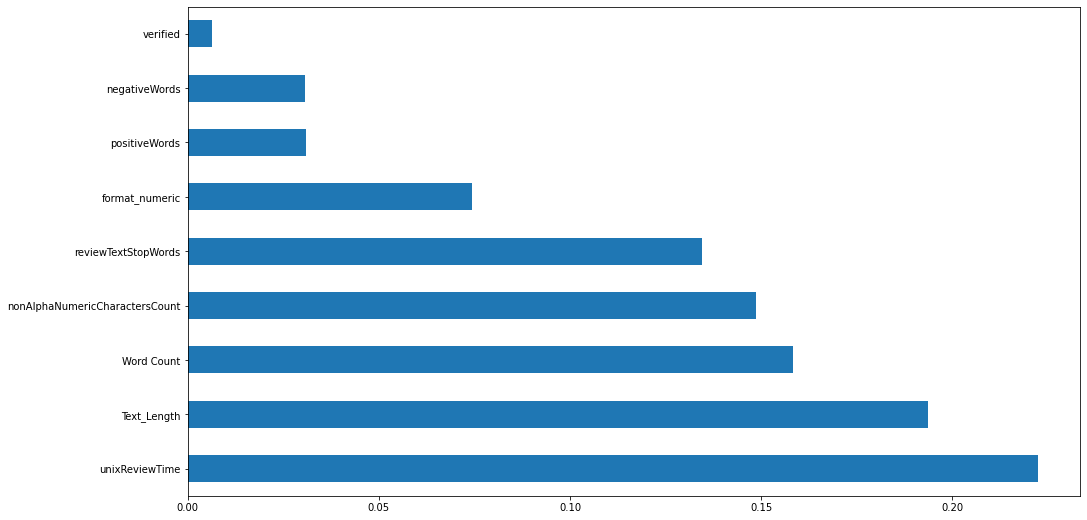

In [82]:
plt.figure(figsize=(16,9))
feature_importance=pd.Series(featureModel.feature_importances_, index=X_feature.columns)
feature_importance.nlargest(100).plot(kind='barh')
plt.show()

> **3. Select the evaluation metric/metrics. Justify your choice.**

In [83]:
# rReference: https://www.kaggle.com/code/nextbigwhat/train-valid-test-split-instead-of-train-test-split. Accessed on July 23rd, 2022
# Reference [3]
# splitting the data in three sets (train, test and validate) as per the percentage mentioned

from sklearn.model_selection import train_test_split, cross_val_score

X = data_set_filtered.loc[:,['unixReviewTime',	'Text_Length',	'Word Count',	'nonAlphaNumericCharactersCount',	'reviewTextStopWords',	'positiveWords', 'negativeWords', 'format_numeric' ]]
y = data_set_filtered['overall']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, train_size = 0.7, random_state=10)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.35,train_size = 0.65, random_state=10)
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
X_validate=X_validate.reset_index(drop=True)
y_validate=y_validate.reset_index(drop=True)
print("Shapes: \n")
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)
print("\nTrain Dataset Head:\n")
print(X_train.head())

Shapes: 

(45492, 8)
(29996, 8)
(24496, 8)

Train Dataset Head:

   unixReviewTime  Text_Length  Word Count  nonAlphaNumericCharactersCount  \
0      1409875200           51          10                               1   
1      1445904000          145          29                               6   
2      1501027200          742         142                              16   
3      1425168000         1248         230                              39   
4      1413417600          181          29                               6   

   reviewTextStopWords  positiveWords  negativeWords  format_numeric  
0                    3              1              1               2  
1                   12              2              2               2  
2                   63              1              1               5  
3                   95              8              8               2  
4                   11              4              4               4  


> **4. Perform hyperparameter tuning if applicable.**

> Hyperparameter tuning is not required for the given model that we will be building as it will be further explained as one of the core reasons in the checking the overfitting of the model. Hypertuning might lead to calibarating dataset which might give us False positives.

> **5. Train and evaluate your model.**

> ***Building Model with Logistic Regression***

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
y_model = model.predict(X_test)
validation_plot_data=[]
validation_plot_data.append(cross_val_score(model, X_validate, y_validate, cv=5))
accuracy_score(y_test, y_model)

0.6250500066675557

> **Building Model with Gaussian Naive Bayes**

In [85]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,y_train)
y2_model = model2.predict(X_test)
validation_plot_data.append(cross_val_score(model2, X_validate, y_validate, cv=5))
accuracy_score(y_test, y2_model)

0.6156154153887184

> **Building Model with Random Forest**

In [86]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y3_model = model3.predict(X_test)
validation_plot_data.append(cross_val_score(model3, X_validate, y_validate, cv=5))
accuracy_score(y_test, y3_model)

0.5988465128683824

***ML Model Comparision between Logistic Regression, Gaussian Naive Bayes and Random Forest***

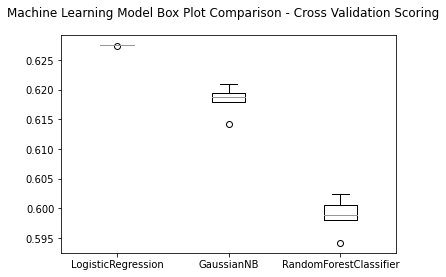

In [87]:
ModelComparisonBoxPlot=plt.figure()
ModelComparisonBoxPlot.suptitle('Machine Learning Model Box Plot Comparison - Cross Validation Scoring')
plt.boxplot(validation_plot_data)
plt.xticks([1, 2, 3], ['LogisticRegression', 'GaussianNB', 'RandomForestClassifier'])
plt.show()

> **6. How do you make sure not to overfit?**

> It is done by randomizing the split between train and test datasets as by randomizing we would not be taking all the unseen data in test data and make the test data completely unique. However the dataset that is being provided to us has data of about over 5 million records but via sub-sampling data is degraded to lesser quantity to over 1 million for data exploration and then later to 1,00,000 records for training, testing and validating the model which might leave us on a problematic edge of unforeseen challenges in hyperparameter tuning for the predictive regression models that we will be using.

> **7. Plot a visualization of the learning process or the learned information of the model.**

> ***Validation Curve for Hyper Parameter Tuning***

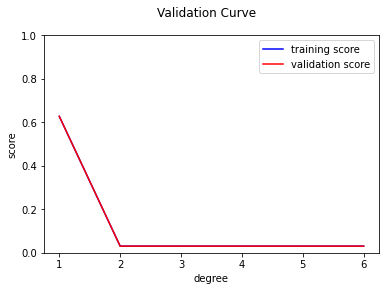

In [88]:
# Reference: [5]
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))
    
degree = np.arange(0, 7)
train_score, val_score = validation_curve(PolynomialRegression(), X_validate, y_validate,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.suptitle("Validation Curve")
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

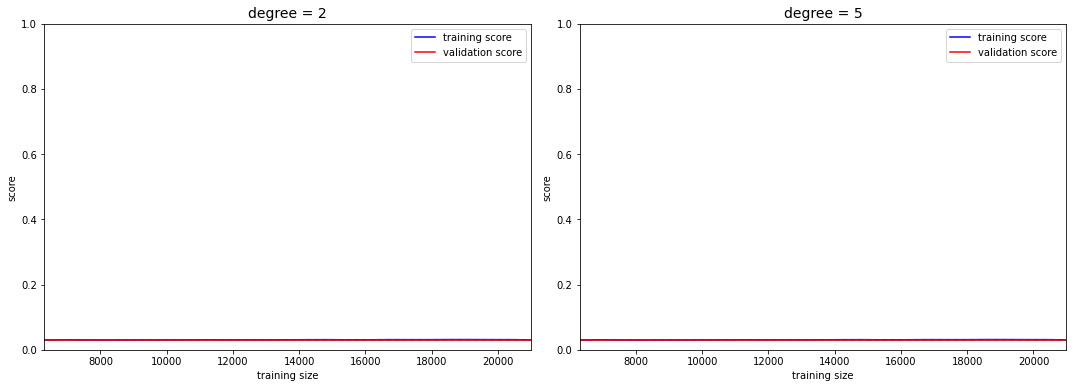

In [89]:
# Reference: [5]

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 5]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X_validate, y_validate, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

> **8. Analyze the results.**

> From the data visualization, we conclude that, The leaning curve remains static over the increase in degree from 2 to 5 while validation curve decreases with the increase in degree of the model. Through which it comes to our understanding that better features should be created out of available features and modeling of the dataset should be then continued.

> Along with which it is fair to say that Logistic Regression is providing us with the best result as showcased above whilst comparing it to other models. Furthermore, we will be looking into Part of speech tagging in our next task.

### 4. Perform part-of-speech tagging

> **1. Perform part-of-speech tagging on the raw data (i.e. prior to Q2), and after processing (after Q2), and extract the nouns only to obtain a bag-of-words tf-idf weighted vector. representation using only the nouns.**

In [90]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [91]:
# part of speech tagging on raw data
tagList = []
import nltk
from nltk.tokenize import word_tokenize
tokenized_sents = [word_tokenize(i) for i in list_block_extract]
for i in tokenized_sents:
  tagList.append(nltk.pos_tag(i))
  print(nltk.pos_tag(i))

[('book', 'NN'), ('shipped', 'VBD'), ('swiftly', 'RB'), ('got', 'VBN'), ('neat', 'JJ'), ('quality', 'NN'), ('good', 'JJ'), ('damages', 'NNS'), ('but', 'CC'), ('didnt', 'JJ'), ('come', 'VBP'), ('cover', 'RB'), ('ordered', 'VBN'), ('in', 'IN'), ('wont', 'NN'), ('sending', 'VBG'), ('back', 'RB'), ('wont', 'JJ'), ('keep', 'NN'), ('myself', 'PRP'), ('buy', 'VBP'), ('book', 'NN'), ('again', 'RB'), ('exactly', 'RB'), ('ordered', 'VBN')]
[('discovered', 'VBN'), ('Gene', 'NNP'), ('StrattonPorter', 'NNP'), ('months', 'NNS'), ('ago', 'RB'), ('fell', 'VBD'), ('love', 'VB'), ('books', 'NNS'), ('eagerly', 'RB'), ('read', 'VBP'), ('everything', 'NN'), ('could', 'MD'), ('get', 'VB'), ('Kindle', 'NNP'), ('enjoyed', 'FW'), ('hit', 'VBD'), ('book', 'NN'), ('surprised', 'VBD'), ('come', 'JJ'), ('across', 'IN'), ('word', 'NN'), ('Jap', 'NNP'), ('early', 'JJ'), ('book', 'NN'), ('thought', 'VBD'), ('must', 'MD'), ('mistake', 'VB'), ('book', 'NN'), ('went', 'VBD'), ('on', 'IN'), ('kept', 'NN'), ('trying', 'VB

In [92]:
# extracting noun only values for BOW and weigt vectorization
nounExtract = []
for noun in tagList:
    # noun values usually starts with NN
    nounExtract.append([j[0] for j in noun if j[1].startswith("NN")])
print("The noun only value extractions are: \n",nounExtract)

The noun only value extractions are: 
 [['book', 'quality', 'damages', 'wont', 'keep', 'book'], ['Gene', 'StrattonPorter', 'months', 'books', 'everything', 'Kindle', 'book', 'word', 'Jap', 'book', 'book', 'kept', 'excuses', 'racism', 'supremacy', 'way', 'story', 'characters', 'way', 'wise', 'people', 'threat', 'supremacy', 'couldnt', 'hadnt', 'view', 'author', 'books', 'product', 'time', 'Skip', 'youll', 'glad', 'Skip', 'cringe'], ['Stars'], ['enjoy', 'books', 'characters', 'story', 'lines', 'book', 'book', 'book'], ['pleasure', 'week', 'LOVED', 'Full', 'scandal', 'drama', 'Rumors', 'entertain', 'title', 'predecessor', 'Luxe', 'Rumors', 'twists', 'end', 'Cant', 'wait', 'Deliciously', 'fun'], ['Stars'], ['Firemans', 'FairRob', 'Wyatt', 'life', 'things', 'lifeEx', 'lawyer', 'Hurricane', 'Hugo', 'Charleston', 'relationships', 'others', 'book', 'National', 'Library', 'Service', 'BARD', 'Braille', 'Audio', 'Reading', 'Device', 'firemans'], ['gift', 'family', 'member', 'sound', 'advice', 'Mi

In [122]:
def singleList(nestedList):
    return [x for nested in nestedList for x in nested]
singleList(nounExtract)

['book',
 'quality',
 'damages',
 'wont',
 'keep',
 'book',
 'Gene',
 'StrattonPorter',
 'months',
 'books',
 'everything',
 'Kindle',
 'book',
 'word',
 'Jap',
 'book',
 'book',
 'kept',
 'excuses',
 'racism',
 'supremacy',
 'way',
 'story',
 'characters',
 'way',
 'wise',
 'people',
 'threat',
 'supremacy',
 'couldnt',
 'hadnt',
 'view',
 'author',
 'books',
 'product',
 'time',
 'Skip',
 'youll',
 'glad',
 'Skip',
 'cringe',
 'Stars',
 'enjoy',
 'books',
 'characters',
 'story',
 'lines',
 'book',
 'book',
 'book',
 'pleasure',
 'week',
 'LOVED',
 'Full',
 'scandal',
 'drama',
 'Rumors',
 'entertain',
 'title',
 'predecessor',
 'Luxe',
 'Rumors',
 'twists',
 'end',
 'Cant',
 'wait',
 'Deliciously',
 'fun',
 'Stars',
 'Firemans',
 'FairRob',
 'Wyatt',
 'life',
 'things',
 'lifeEx',
 'lawyer',
 'Hurricane',
 'Hugo',
 'Charleston',
 'relationships',
 'others',
 'book',
 'National',
 'Library',
 'Service',
 'BARD',
 'Braille',
 'Audio',
 'Reading',
 'Device',
 'firemans',
 'gift',
 'fam

In [94]:
# Referrence: https://pythonprogramminglanguage.com/bag-of-words/ Accessed on july 23rd

from sklearn.feature_extraction.text import CountVectorizer

# uniqueVal = set(list_block_extract)
vectorizer = CountVectorizer()
vectorizer.fit_transform(singleList(nounExtract)).todense()

marklist = sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)
print(sortdict)

{'zane': 515, 'youll': 514, 'years': 513, 'ye': 512, 'wyatt': 511, 'writes': 510, 'wow': 509, 'wounds': 508, 'world': 507, 'work': 506, 'word': 505, 'woods': 504, 'wont': 503, 'wise': 502, 'winchester': 501, 'wincest': 500, 'wife': 499, 'whats': 498, 'well': 497, 'week': 496, 'wedding': 495, 'ways': 494, 'way': 493, 'watch': 492, 'wasnt': 491, 'war': 490, 'wait': 489, 'voyage': 488, 'visuals': 487, 'virgin': 486, 'violence': 485, 'view': 484, 'video': 483, 'vibe': 482, 'versatility': 481, 'variety': 480, 'val': 479, 'update': 478, 'university': 477, 'undone': 476, 'tys': 475, 'ty': 474, 'twists': 473, 'tv': 472, 'try': 471, 'truths': 470, 'trouble': 469, 'tries': 468, 'totheyre': 467, 'tortures': 466, 'torturers': 465, 'tolkien': 464, 'today': 463, 'title': 462, 'times': 461, 'time': 460, 'tilts': 459, 'tigers': 458, 'threat': 457, 'things': 456, 'theyre': 455, 'theres': 454, 'thank': 453, 'tension': 452, 'tender': 451, 'teens': 450, 'teenager': 449, 'teen': 448, 'technology': 447, 'ta

In [95]:
# Reference: https://pythonwife.com/tf-idf-vectors-in-natural-language-processing/

# finding tf-idf weights for the data representation
from sklearn.feature_extraction.text import TfidfVectorizer
nouns = pd.Series(singleList(nounExtract))
vectorizer = TfidfVectorizer()
tf_idf_matrix  = vectorizer.fit_transform(nouns)
output = tf_idf_matrix.toarray()
output

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

tf_idf =  vec.fit_transform(singleList(nounExtract))
print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names()))

     ability  abstinent  actions  addict  addiction  admit  adults  adventure  \
0        0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
1        0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
2        0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
3        0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
4        0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
..       ...        ...      ...     ...        ...    ...     ...        ...   
802      0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
803      0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
804      0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
805      0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   
806      0.0        0.0      0.0     0.0        0.0    0.0     0.0        0.0   

     adventures  advice  ..

> **2. Repeat Question Q3**

> We are building a supervised regression model and grid-search algorithm for proprocessing and finding the accuracy of the model.

In [97]:
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,...,Merge,MergeWithoutStopWords,Stoppers,RemoveDigitsNonLetters,RemoveDigitsNonLetters_Count,RemoveDigitsNonLetters_TrimCount,Split,positiveWords,negativeWords,format_numeric
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,...,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...,0,book great David Levithan really wonderful aut...,34,0,"book,great,David,Levithan,really,wonderful,aut...",6,6,1
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,...,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....,0,Could put down kept wanting know happen nextHi...,6,0,"Could,put,down,kept,wanting,know,happen,nextHi...",0,0,2
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,...,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...,0,one best nonfiction books ever read Timothy Eg...,18,0,"one,best,nonfiction,books,ever,read,Timothy,Eg...",2,2,3
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,...,"son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea...",0,son turned the man comes hunting hogs Great s...,7,0,"son,turned,the,man,comes,hunting,hogs,,Great,s...",1,1,4
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,...,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...,0,book amazing pulls beginning keeps wondering e...,13,0,"book,amazing,pulls,beginning,keeps,wondering,e...",1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,...,Louv opens doors look upon contemporary proble...,Louv opens doors look upon contemporary proble...,0,Louv opens doors look upon contemporary proble...,102,0,"Louv,opens,doors,look,upon,contemporary,proble...",5,5,5
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,...,spiritual content traditional Russian Orthodox...,spiritual content traditional Russian Orthodox...,0,spiritual content traditional Russian Orthodox...,16,0,"spiritual,content,traditional,Russian,Orthodox...",4,4,5
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,...,"one Clan Donald, love wee book. turned many fr...","one Clan Donald, love wee book. turned many fr...",0,one Clan Donald love wee book turned many frie...,15,0,"one,Clan,Donald,love,wee,book,turned,many,frie...",4,4,4
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,...,"used editions Rome, Florence, Prague, Stockhol...","used editions Rome, Florence, Prague, Stockhol...",0,used editions Rome Florence Prague Stockholm P...,4,0,"used,editions,Rome,Florence,Prague,Stockholm,P...",1,1,5


In [99]:
# Evaluation and feature selection
X_feature = data_set_filtered.loc[:,['Text_Length',	'Word Count',	'nonAlphaNumericCharactersCount',	'reviewTextStopWords',	'positiveWords', 'negativeWords']]
X_feature.head()

,Text_Length,Word Count,nonAlphaNumericCharactersCount,reviewTextStopWords,positiveWords,negativeWords
196263,1020,186,32,85,6,6
841765,135,22,6,8,0,0
796959,600,109,14,50,2,2
960041,162,34,4,17,1,1
527939,170,28,11,13,1,1


In [101]:
Y_feature=data_set_filtered.loc[:,['overall']]
Y_feature

,overall
196263,5
841765,5
796959,5
960041,5
527939,5
...,...
681225,5
398806,4
867604,5
854943,4


In [123]:
#Reference: Used tutorial slides as reference in finding the accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

dataAccuracy = data_set_filtered

model = GaussianNB()                       
X_val = dataAccuracy.drop(['reviewTime','asin','unixReviewTime','reviewTextFiltered','style','reviewerName','format','reviewText','summary','Merge','MergeWithoutStopWords','Stoppers','RemoveDigitsNonLetters','RemoveDigitsNonLetters_TrimCount','Split'], axis = 1)
y_val = dataAccuracy['overall']


Xtrain, Xtest, ytrain, ytest = train_test_split(X_val, y_val, random_state=1)

model.fit(Xtrain, ytrain)                   
y_model = model.predict(Xtest)              

print("The accuracy score of the data is","%.2f%%" % (accuracy_score(ytest, y_model) * 100))

X_val

The accuracy score of the data is 100.00%


,overall,verified,Text_Length,Word Count,nonAlphaNumericCharactersCount,reviewTextStopWords,RemoveDigitsNonLetters_Count,positiveWords,negativeWords,format_numeric
196263,5,0,1020,186,32,85,34,6,6,1
841765,5,1,135,22,6,8,6,0,0,2
796959,5,0,600,109,14,50,18,2,2,3
960041,5,1,162,34,4,17,7,1,1,4
527939,5,1,170,28,11,13,13,1,1,5
...,...,...,...,...,...,...,...,...,...,...
681225,5,1,2015,299,91,113,102,5,5,5
398806,4,1,386,66,14,26,16,4,4,5
867604,5,1,397,73,15,30,15,4,4,4
854943,4,1,171,31,4,14,4,1,1,5


In [124]:
# Evaluating the model using Regression and grid-search algorithm
from sklearn.ensemble import ExtraTreesRegressor
featureModel=ExtraTreesRegressor()
featureModel.fit(X_feature, Y_feature)
print(featureModel.feature_importances_)

[0.36331889 0.2238215  0.1974935  0.16646406 0.02547794 0.02342411]


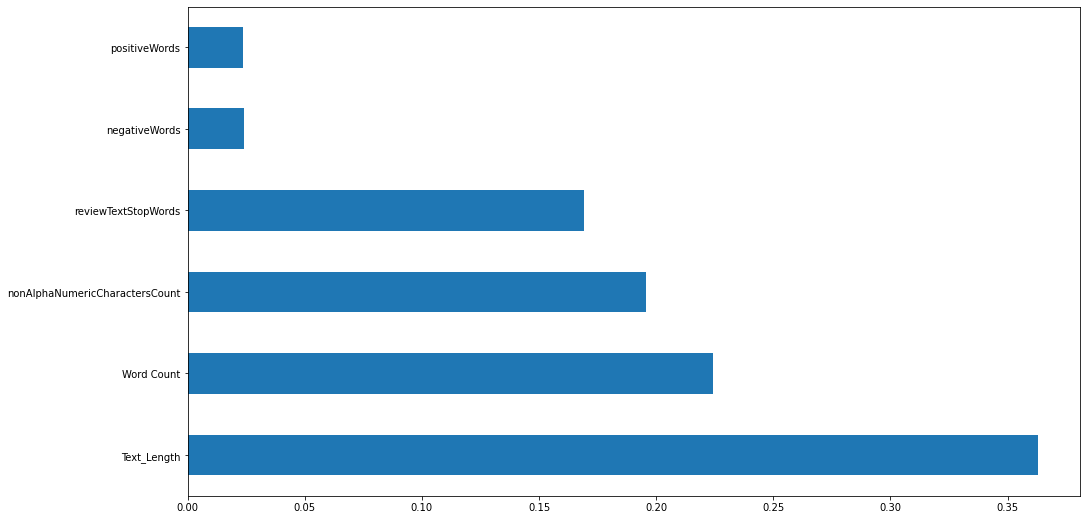

In [118]:
# Visualizing the modela
plt.figure(figsize=(16,9))
feature_importance=pd.Series(featureModel.feature_importances_, index=X_feature.columns)
feature_importance.nlargest(100).plot(kind='barh')
plt.show()

In [120]:
# Do hyperparameter tuning with cross validation to avoid any overfitting data or inaccuracy

# Reference: https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7

from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
# model = LogisticRegression()
grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

model.fit(Xtrain, ytrain)
preds = model.predict(Xtest)
grid_lr

GridSearchCV(cv=6, estimator=GaussianNB(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

> Doing regularization, ensembling the model and training with more number of data features and attributes helps in getting the data not to overfit. If there are chances of being overfit, we need to get a sign of early stopping methodology to get rid of irrelevant data.

> Hence from the above results, we can conclude that the accuracy of the model has increased after the model got preprocessed and made some necessary concept requlations.

> **3. Compare the performance with what you received in Q3 and Q4 with a statistical significance test. Discuss your findings.**

In [127]:
data_set_filtered

,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,Text_Length,...,Merge,MergeWithoutStopWords,Stoppers,RemoveDigitsNonLetters,RemoveDigitsNonLetters_Count,RemoveDigitsNonLetters_TrimCount,Split,positiveWords,negativeWords,format_numeric
196263,5,0,"06 5, 2007",0375824006,{'Format:': ' Audio CD'},Ariell,This book was great! David Levithan is really ...,Boy Meets ME!!,1181001600,1020,...,book great! David Levithan really wonderful au...,book great! David Levithan really wonderful au...,0,book great David Levithan really wonderful aut...,34,0,"book,great,David,Levithan,really,wonderful,aut...",6,6,1
841765,5,1,"07 26, 2017",B01ERKH2ZE,{'Format:': ' Kindle Edition'},Rebecca G,Could not put it down. I kept wanting to know ...,Page turner,1501027200,135,...,Could put down. kept wanting know happen next....,Could put down. kept wanting know happen next....,0,Could put down kept wanting know happen nextHi...,6,0,"Could,put,down,kept,wanting,know,happen,nextHi...",0,0,2
796959,5,0,"09 10, 2016",B000FEBQJU,{},Lucy M.,This was one of the best non-fiction books I h...,An Important Book,1473465600,600,...,one best non-fiction books ever read. Timothy ...,one best non-fiction books ever read. Timothy ...,0,one best nonfiction books ever read Timothy Eg...,18,0,"one,best,nonfiction,books,ever,read,Timothy,Eg...",2,2,3
960041,5,1,"03 8, 2016",1592284280,{'Format:': ' Hardcover'},Texas Bones,"Our son has turned into ""the man"" when it come...",Oink! Oink! - Down Goes Porky,1457395200,162,...,"son turned ""the man"" comes hunting hogs. Grea...","son turned ""the man"" comes hunting hogs. Grea...",0,son turned the man comes hunting hogs Great s...,7,0,"son,turned,the,man,comes,hunting,hogs,,Great,s...",1,1,4
527939,5,1,"05 17, 2012",1468097350,{'Format:': ' Paperback'},Cambridge Mn reader,This book is so amazing!! It pulls you in from...,loved this book!!,1337212800,170,...,book amazing!! pulls beginning keeps wondering...,book amazing!! pulls beginning keeps wondering...,0,book amazing pulls beginning keeps wondering e...,13,0,"book,amazing,pulls,beginning,keeps,wondering,e...",1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681225,5,1,"02 26, 2010",1565125223,{'Format:': ' Paperback'},David G. Robinson,Louv opens the doors to look in upon a contemp...,GO OUTSIDE WITH YOUR KIDS,1267142400,2015,...,Louv opens doors look upon contemporary proble...,Louv opens doors look upon contemporary proble...,0,Louv opens doors look upon contemporary proble...,102,0,"Louv,opens,doors,look,upon,contemporary,proble...",5,5,5
398806,4,1,"03 16, 2016",0884652874,{'Format:': ' Paperback'},Luke,The spiritual content is traditional Russian O...,A venerable elder's guide to the angelic life,1458086400,386,...,spiritual content traditional Russian Orthodox...,spiritual content traditional Russian Orthodox...,0,spiritual content traditional Russian Orthodox...,16,0,"spiritual,content,traditional,Russian,Orthodox...",4,4,5
867604,5,1,"07 10, 2015",0393080005,{'Format:': ' Hardcover'},Renate W. Davis,"Being one of Clan Donald, I love this wee book...",I love this wee book,1436486400,397,...,"one Clan Donald, love wee book. turned many fr...","one Clan Donald, love wee book. turned many fr...",0,one Clan Donald love wee book turned many frie...,15,0,"one,Clan,Donald,love,wee,book,turned,many,frie...",4,4,4
854943,4,1,"08 11, 2012",0307263835,{'Format:': ' Paperback'},Curious,"I have used such editions in Rome, Florence, P...",Continuing a fine tradition,1344643200,171,...,"used editions Rome, Florence, Prague, Stockhol...","used editions Rome, Florence, Prague, Stockhol...",0,used editions Rome Florence Prague Stockholm P...,4,0,"used,editions,Rome,Florence,Prague,Stockholm,P...",1,1,5


In [158]:
# Refrence: https://www.analyticsvidhya.com/blog/2021/07/t-test-performing-hypothesis-testing-with-python/ Accessed on 23rd July 2022

# Finding the statistical test for the final prediction model of overall rating and whether its verified or not
alpha = 0.05
first_test =data_set_filtered['overall']
second_test=data_set_filtered['verified']

from scipy import stats

t_value,p_value=stats.ttest_rel(first_test,second_test)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)


if one_tailed_p_value<=alpha:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the students have benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)
else:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the students have not benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)


Test statistic is 1089.994850
p-value for one_tailed_test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the students have benefited by the tuition class. i.e., d = 0 at 0.05 level of significance.


Overall from the detailed observations, we can conclude to the statemnet that as there is more preprocessing and data cleaning for the part-of-speech tagging. We can get more accuracted data on the combination of textual features. According to the significance value, we can predict some more detailed feature extractions when compared with the model we used in Q3.

**Reference**


1. "pandas - Python Data Analysis Library", Pandas.pydata.org, 2022. Available: https://pandas.pydata.org/. <a id='1'></a> 
2. "scikit-learn: machine learning in Python — scikit-learn 1.1.1 documentation", Scikit-learn.org, 2022. Available: https://scikit-learn.org/stable/. <a id='2'></a> 
3. "Matplotlib — Visualization with Python", Matplotlib.org, 2022. Available: https://matplotlib.org/.<a id='3'></a> 
4. Code Reference from Tutorial 11, Credits to Maksym Tarahukhin
5. Certain Code Reference from Tutorial 2 and Tutorial 3, Credits to Maksym Tarahukhin 